# Characteristic of Olist

Olist is an e-commerce from Brazil. <br>
While, the customer could register freely on the website. <br>
The selling system is still in an offline process, where an Olist sales will look for a potential seller (mostly SME), and then if both parties agree, the sales will register the seller into the Olist website. <br>
Therefore, it is good for Olist to improve seller's performance to also increase Olist's sales. The recommendation is to know which features to improve to increase seller's order count on Olist.

## Objective

* To see the characteristic of sellers' and customer's on Olist. 
* Predict future sales & order.
* (Further analysis) To look for the nearest delivery spot, especially for sellers' drop-off point/inventory.

## Import Libraries

In [ ]:
# loading in modules
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data
<a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce">Olist Dataset</a> consists 9 csv files.

In [ ]:
# creating file path
dbfile = '/Users/Milvin/olist.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

### Dataset Schema
![image.png](attachment:319a3cf9-545f-40e5-9dfb-d5279001fe4d.png)

In [ ]:
def generate_docs(db, docs, title):
    """
    to generate a documentation for the database which will show all columns in each tables
    the output is an '.md' file
    """
    # open doc file and define table template
    f = open(docs, "w+")
    f.write(title + "\n")
    table_template = "|{}|{}|\n| :-: | :-:|\n".format(
        "COLUMN", "DESCRIPTION")
    # open database
    conn = sqlite3.connect(db)
    c = conn.cursor()
    c.execute("SELECT name FROM sqlite_master WHERE type='table';")
    for table in c.fetchall():
        # print table name
        table_name = table[0].upper()
        f.write("### {}\n".format(table_name))
        f.write(table_template)
        # print table columns
        c.execute("SELECT * FROM {};".format(table_name))
        cols = [description[0] for description in c.description]
        for col in cols:
            f.write("| {} | |\n".format(col))
    f.close()


generate_docs("/Users/Milvin/olist.db", "Olist.md",
              "# Olist Database Documentation")

In [ ]:
# creating cursor
cur = con.cursor()

In [ ]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [ ]:
create_connection(dbfile)

In [ ]:
# reading all table names

table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


There are **9 tables** in this database.

## Joining Tables
Selecting which tables to explore more and join those tables.

### Customer Table
To see the order and how long does it take to finish it.

In [ ]:
df_cust = pd.read_sql_query("SELECT order_id, oc.customer_id, order_status, customer_state, order_purchase_timestamp, \
                       order_delivered_carrier_date, order_delivered_customer_date, \
                       (strftime('%Y%m%d', order_delivered_carrier_date) - strftime('%Y%m%d', order_purchase_timestamp)) handed_to_courier_time, \
                       (strftime('%Y%m%d', order_delivered_customer_date) - strftime('%Y%m%d', order_purchase_timestamp)) delivery_time \
                       FROM olist_order_customer_dataset oc \
                       JOIN olist_order_dataset o \
                       ON o.customer_id = oc.customer_id \
                       GROUP BY order_id \
                       ", con)
df_cust.head()

,order_id,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,RJ,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,6.0,7.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,SP,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,78.0,86.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,MG,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2.0,8.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,SP,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2.0,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,SP,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,12.0,97.0


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   customer_state                 99441 non-null  object 
 4   order_purchase_timestamp       99441 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   handed_to_courier_time         97658 non-null  float64
 8   delivery_time                  96476 non-null  float64
dtypes: float64(2), object(7)
memory usage: 6.8+ MB


In [ ]:
df_cust[(df_cust['handed_to_courier_time'] < 0) | (df_cust['delivery_time'] < 0)]

,order_id,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time
24840,4021cd7611d6d9ce5ffcd24817fc374f,ac27243bffbc9c58eb62adfb58c71488,delivered,SP,2018-08-18 11:49:40,2018-08-14 06:22:00,2018-08-29 04:41:53,-4.0,11.0
48241,7c48bb55e8e4f7e56d412e9653db37bc,34ef6181341eb36c47fd601c46878f00,delivered,SP,2018-07-16 18:40:53,2018-01-26 13:35:00,2018-07-23 20:04:45,-590.0,7.0


Drop rows with anomaly data.

In [ ]:
df_cust = df_cust[~((df_cust['handed_to_courier_time'] < 0) | (df_cust['delivery_time'] < 0))]
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99439 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99439 non-null  object 
 1   customer_id                    99439 non-null  object 
 2   order_status                   99439 non-null  object 
 3   customer_state                 99439 non-null  object 
 4   order_purchase_timestamp       99439 non-null  object 
 5   order_delivered_carrier_date   97656 non-null  object 
 6   order_delivered_customer_date  96474 non-null  object 
 7   handed_to_courier_time         97656 non-null  float64
 8   delivery_time                  96474 non-null  float64
dtypes: float64(2), object(7)
memory usage: 7.6+ MB


Currently there are 4 columns with some null-values in 2 columns. This will be handled when all the tables are joined.

### Product Table

In [ ]:
df_product = pd.read_sql_query("SELECT product_id, product_category_name_english AS product_category \
                       FROM product_category_name_translation cat \
                       JOIN olist_products_dataset p \
                       ON p.product_category_name = cat.product_category_name \
                       ", con)
df_product.head()

,product_id,product_category
0,00210e41887c2a8ef9f791ebc780cc36,health_beauty
1,0042f1a9a7e0edd1400c6cd0fda065f8,health_beauty
2,006619bbed68b000c8ba3f8725d5409e,health_beauty
3,00878d953636afec00d3e85d55a12e7f,health_beauty
4,008b0ec3de3638637099f97add750136,health_beauty


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        32328 non-null  object
 1   product_category  32328 non-null  object
dtypes: object(2)
memory usage: 505.2+ KB


### Order Table
To see the sellers, the products that are sold, price per item, total price (payment_value), ratings that are given to the order.

In [ ]:
df_order = pd.read_sql_query("SELECT oi.seller_id, orev.order_id, product_id, review_score,payment_value, price, \
                            freight_value, COUNT(product_id) total_prod, COUNT(DISTINCT orev.order_id) total_order \
                            FROM olist_order_reviews_dataset orev \
                            JOIN olist_order_payments_dataset op \
                            ON orev.order_id = op.order_id \
                            JOIN olist_order_items_dataset oi \
                            ON oi.order_id = op.order_id \
                            GROUP BY seller_id, orev.order_id \
                            ", con)
df_order.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1


In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99246 entries, 0 to 99245
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_id      99246 non-null  object 
 1   order_id       99246 non-null  object 
 2   product_id     99246 non-null  object 
 3   review_score   99246 non-null  int64  
 4   payment_value  99246 non-null  float64
 5   price          99246 non-null  float64
 6   freight_value  99246 non-null  float64
 7   total_prod     99246 non-null  int64  
 8   total_order    99246 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 6.8+ MB


## Seller Table

In [ ]:
df_seller = pd.read_sql_query("SELECT seller_id, seller_state \
                            FROM olist_sellers_dataset \
                            ", con)
df_seller.head()

,seller_id,seller_state
0,3442f8959a84dea7ee197c632cb2df15,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,SP


In [ ]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_state  3095 non-null   object
dtypes: object(2)
memory usage: 48.5+ KB


### Merged Table
First, merge seller & order table.

In [ ]:
df_merge1 = pd.merge(df_order, df_seller, on="seller_id", how="left")
df_merge1.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES


In [ ]:
df_merge2 = pd.merge(df_merge1, df_cust, on="order_id", how="left")
df_merge2.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,d9442164acf4b03109425633efaa0cfc,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,23bfd4316e261786deed5a08231c75bc,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,a5ced4926d7d8fa71e9be2b007720356,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0


In [ ]:
df_merge_fin = pd.merge(df_merge2, df_product, on="product_id", how="left")
df_merge_fin.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,d9442164acf4b03109425633efaa0cfc,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,23bfd4316e261786deed5a08231c75bc,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,a5ced4926d7d8fa71e9be2b007720356,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools


In [ ]:
df_merge_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99246 entries, 0 to 99245
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seller_id                      99246 non-null  object 
 1   order_id                       99246 non-null  object 
 2   product_id                     99246 non-null  object 
 3   review_score                   99246 non-null  int64  
 4   payment_value                  99246 non-null  float64
 5   price                          99246 non-null  float64
 6   freight_value                  99246 non-null  float64
 7   total_prod                     99246 non-null  int64  
 8   total_order                    99246 non-null  int64  
 9   seller_state                   99246 non-null  object 
 10  customer_id                    99244 non-null  object 
 11  order_status                   99244 non-null  object 
 12  customer_state                 99244 non-null 

* The date data needs to be changed to dtime.
* There are ~2% missing values in `order_delivered_carrier_date`, `order_delivered_customer_date`, `handed_to_courier_time`, `delivery_time`, and `prodct_category` columns. <br>
* To feel the null values, first must check whether the status is <i>delivered</i> or not, if it is <i>delivered</i>, then it would be filled with mean values from the columns.

In [ ]:
## change dtype

df_merge_fin[['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date']] =  \
df_merge_fin[['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date']].apply(pd.to_datetime)

In [ ]:
df_merge_fin.dtypes

seller_id                                object
order_id                                 object
product_id                               object
review_score                              int64
payment_value                           float64
price                                   float64
freight_value                           float64
total_prod                                int64
total_order                               int64
seller_state                             object
customer_id                              object
order_status                             object
customer_state                           object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
handed_to_courier_time                  float64
delivery_time                           float64
product_category                         object
dtype: object

In [ ]:
## total of null-values

df_merge_fin.isnull().sum()

seller_id                           0
order_id                            0
product_id                          0
review_score                        0
payment_value                       0
price                               0
freight_value                       0
total_prod                          0
total_order                         0
seller_state                        0
customer_id                         2
order_status                        2
customer_state                      2
order_purchase_timestamp            2
order_delivered_carrier_date      994
order_delivered_customer_date    2092
handed_to_courier_time            994
delivery_time                    2092
product_category                 1445
dtype: int64

In [ ]:
df_merge_fin.duplicated().sum()

0

In [ ]:
## check unique values in 'product_category'

df_merge_fin['product_category'].value_counts()

bed_bath_table               9477
health_beauty                8790
sports_leisure               7715
computers_accessories        6713
furniture_decor              6465
                             ... 
arts_and_craftmanship          23
la_cuisine                     12
cds_dvds_musicals              12
fashion_childrens_clothes       8
security_and_services           2
Name: product_category, Length: 71, dtype: int64

## Null-values

### By order status

In [ ]:
## create a new dataframe for null-values 

check_null = df_merge_fin[(df_merge_fin['handed_to_courier_time'].isnull()) | (df_merge_fin['delivery_time'].isnull())]
check_null['order_status'].value_counts()

shipped        1033
canceled        438
invoiced        307
processing      295
delivered         9
unavailable       7
approved          2
Name: order_status, dtype: int64

In [ ]:
# dataframe for null-values in 'delivered' status, null values replaced with the mean of 'delivery_time'

check_null_1 = check_null[check_null['order_status'] == 'delivered']
check_null_1['delivery_time'].fillna(df_merge_fin['delivery_time'].mean(), inplace=True)
check_null_1['handed_to_courier_time'].fillna(df_merge_fin['handed_to_courier_time'].mean(), inplace=True)
check_null_1.isnull().sum()

C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\784888895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_1['delivery_time'].fillna(df_merge_fin['delivery_time'].mean(), inplace=True)
C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\784888895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_1['handed_to_courier_time'].fillna(df_merge_fin['handed_to_courier_time'].mean(), inplace=True)


seller_id                        0
order_id                         0
product_id                       0
review_score                     0
payment_value                    0
price                            0
freight_value                    0
total_prod                       0
total_order                      0
seller_state                     0
customer_id                      0
order_status                     0
customer_state                   0
order_purchase_timestamp         0
order_delivered_carrier_date     2
order_delivered_customer_date    8
handed_to_courier_time           0
delivery_time                    0
product_category                 0
dtype: int64

In [ ]:
# dataframe for null-values in 'shipped' status filled with the column before it

check_null_2 = check_null[check_null['order_status'] == 'shipped']
check_null_2['delivery_time'].fillna(check_null_2['handed_to_courier_time'], inplace=True)
check_null_2.isnull().sum()

C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\1683995574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_2['delivery_time'].fillna(check_null_2['handed_to_courier_time'], inplace=True)


seller_id                           0
order_id                            0
product_id                          0
review_score                        0
payment_value                       0
price                               0
freight_value                       0
total_prod                          0
total_order                         0
seller_state                        0
customer_id                         0
order_status                        0
customer_state                      0
order_purchase_timestamp            0
order_delivered_carrier_date        0
order_delivered_customer_date    1033
handed_to_courier_time              0
delivery_time                       0
product_category                   23
dtype: int64

In [ ]:
# 'order_delivered_customer_date' column filled with the column before it

check_null_2['order_delivered_customer_date'].fillna(check_null_2['order_delivered_carrier_date'], inplace=True)
check_null_2.isnull().sum()

C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\3554227885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_2['order_delivered_customer_date'].fillna(check_null_2['order_delivered_carrier_date'], inplace=True)


seller_id                         0
order_id                          0
product_id                        0
review_score                      0
payment_value                     0
price                             0
freight_value                     0
total_prod                        0
total_order                       0
seller_state                      0
customer_id                       0
order_status                      0
customer_state                    0
order_purchase_timestamp          0
order_delivered_carrier_date      0
order_delivered_customer_date     0
handed_to_courier_time            0
delivery_time                     0
product_category                 23
dtype: int64

In [ ]:
# dataframe for null-values in other than 'delivered' & 'shipped' status, filled with 0

check_null_3 = check_null[~((check_null['order_status'] == 'delivered') | (check_null['order_status'] == 'shipped'))]
check_null_3.fillna(0, inplace=True)
check_null_3.isnull().sum()

C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\2374088403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_null_3.fillna(0, inplace=True)


seller_id                        0
order_id                         0
product_id                       0
review_score                     0
payment_value                    0
price                            0
freight_value                    0
total_prod                       0
total_order                      0
seller_state                     0
customer_id                      0
order_status                     0
customer_state                   0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
handed_to_courier_time           0
delivery_time                    0
product_category                 0
dtype: int64

In [ ]:
# combine all three dataframes into 1 dataframe by using append

seller_cust1 = check_null_1.append(check_null_2, ignore_index=True)
seller_cust1 = seller_cust1.append(check_null_3, ignore_index=True)

C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\3845966211.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seller_cust1 = check_null_1.append(check_null_2, ignore_index=True)
C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\3845966211.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seller_cust1 = seller_cust1.append(check_null_3, ignore_index=True)


In [ ]:
## fill null-values for `product_category` with the mode value

seller_cust1['product_category'].fillna('bed_bath_table', inplace=True)
seller_cust1.isnull().sum()

seller_id                        0
order_id                         0
product_id                       0
review_score                     0
payment_value                    0
price                            0
freight_value                    0
total_prod                       0
total_order                      0
seller_state                     0
customer_id                      0
order_status                     0
customer_state                   0
order_purchase_timestamp         0
order_delivered_carrier_date     2
order_delivered_customer_date    8
handed_to_courier_time           0
delivery_time                    0
product_category                 0
dtype: int64

In [ ]:
# fill the date with the column before it

seller_cust1['order_delivered_customer_date'].fillna(seller_cust1['order_purchase_timestamp'], inplace=True)
seller_cust1['order_delivered_carrier_date'].fillna(seller_cust1['order_purchase_timestamp'], inplace=True)

In [ ]:
seller_cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seller_id                      2093 non-null   object 
 1   order_id                       2093 non-null   object 
 2   product_id                     2093 non-null   object 
 3   review_score                   2093 non-null   int64  
 4   payment_value                  2093 non-null   float64
 5   price                          2093 non-null   float64
 6   freight_value                  2093 non-null   float64
 7   total_prod                     2093 non-null   int64  
 8   total_order                    2093 non-null   int64  
 9   seller_state                   2093 non-null   object 
 10  customer_id                    2093 non-null   object 
 11  order_status                   2093 non-null   object 
 12  customer_state                 2093 non-null   o

In [ ]:
seller_cust1.duplicated().sum()

0

### Merge all rows

In [ ]:
## prepare a copy of original dataframe to be the base

df_eda = df_merge_fin.copy()
df_eda.isnull().sum()

seller_id                           0
order_id                            0
product_id                          0
review_score                        0
payment_value                       0
price                               0
freight_value                       0
total_prod                          0
total_order                         0
seller_state                        0
customer_id                         2
order_status                        2
customer_state                      2
order_purchase_timestamp            2
order_delivered_carrier_date      994
order_delivered_customer_date    2092
handed_to_courier_time            994
delivery_time                    2092
product_category                 1445
dtype: int64

In [ ]:
df_eda.dropna(inplace=True)
df_eda.isnull().sum()

seller_id                        0
order_id                         0
product_id                       0
review_score                     0
payment_value                    0
price                            0
freight_value                    0
total_prod                       0
total_order                      0
seller_state                     0
customer_id                      0
order_status                     0
customer_state                   0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
handed_to_courier_time           0
delivery_time                    0
product_category                 0
dtype: int64

In [ ]:
# concat the appended dataframe into the base dataframe

df_eda_fin = pd.concat([df_eda, seller_cust1], ignore_index=True)
df_eda_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97860 entries, 0 to 97859
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seller_id                      97860 non-null  object 
 1   order_id                       97860 non-null  object 
 2   product_id                     97860 non-null  object 
 3   review_score                   97860 non-null  int64  
 4   payment_value                  97860 non-null  float64
 5   price                          97860 non-null  float64
 6   freight_value                  97860 non-null  float64
 7   total_prod                     97860 non-null  int64  
 8   total_order                    97860 non-null  int64  
 9   seller_state                   97860 non-null  object 
 10  customer_id                    97860 non-null  object 
 11  order_status                   97860 non-null  object 
 12  customer_state                 97860 non-null 

The datetime columns need to be changed.

In [ ]:
## change dtype

df_eda_fin[['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date']] =  \
df_eda_fin[['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date']].apply(pd.to_datetime, errors='coerce')

In [ ]:
df_eda_fin.dtypes

seller_id                                object
order_id                                 object
product_id                               object
review_score                              int64
payment_value                           float64
price                                   float64
freight_value                           float64
total_prod                                int64
total_order                               int64
seller_state                             object
customer_id                              object
order_status                             object
customer_state                           object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
handed_to_courier_time                  float64
delivery_time                           float64
product_category                         object
dtype: object

The final dataframe consists of 97860 rows. <br>
There is no null values.

## Duplicated Values

In [ ]:
df_eda_fin.duplicated().sum()

0

## Statistic Descriptive

### Numerical

In [ ]:
df_num = df_eda_fin.select_dtypes(include='number')
df_num.describe()

,review_score,payment_value,price,freight_value,total_prod,total_order,handed_to_courier_time,delivery_time
count,97860.000000,97860.000000,97860.000000,97860.000000,97860.000000,97860.0,97860.000000,97860.000000
mean,4.089086,158.197129,125.357000,20.205817,1.182138,1.0,62.474709,256.763363
std,1.343457,216.958079,188.747788,15.930426,0.705690,0.0,684.929118,1378.346095
min,1.000000,0.000000,0.850000,0.000000,1.000000,1.0,0.000000,0.000000
25%,4.000000,59.517500,41.550000,13.250000,1.000000,1.0,1.000000,7.000000
50%,5.000000,103.470000,79.000000,16.390000,1.000000,1.0,2.000000,12.000000
75%,5.000000,176.650000,139.900000,21.300000,1.000000,1.0,4.000000,82.000000
max,5.000000,13664.080000,6735.000000,409.680000,42.000000,1.0,9187.000000,9392.000000


* Probably, other than `total_order`, all columns are skewed to the right. Those columns are: `payment_value`, `price`, `freight_value`, `total_prod`, `handed_to_courier_time`, and `delivery_time` have a high max value and it is far from the mean value.
* While `review_score` is more skewed to the left, with values from Q2-max are all 5.
* Most of the `total_order` is 1.
* `payment_value` has a minimum value 0, it means that there are some order that are not yet paid.
* `freight_value` could be 0.

Text(0.5, 1.0, 'delivery_time')

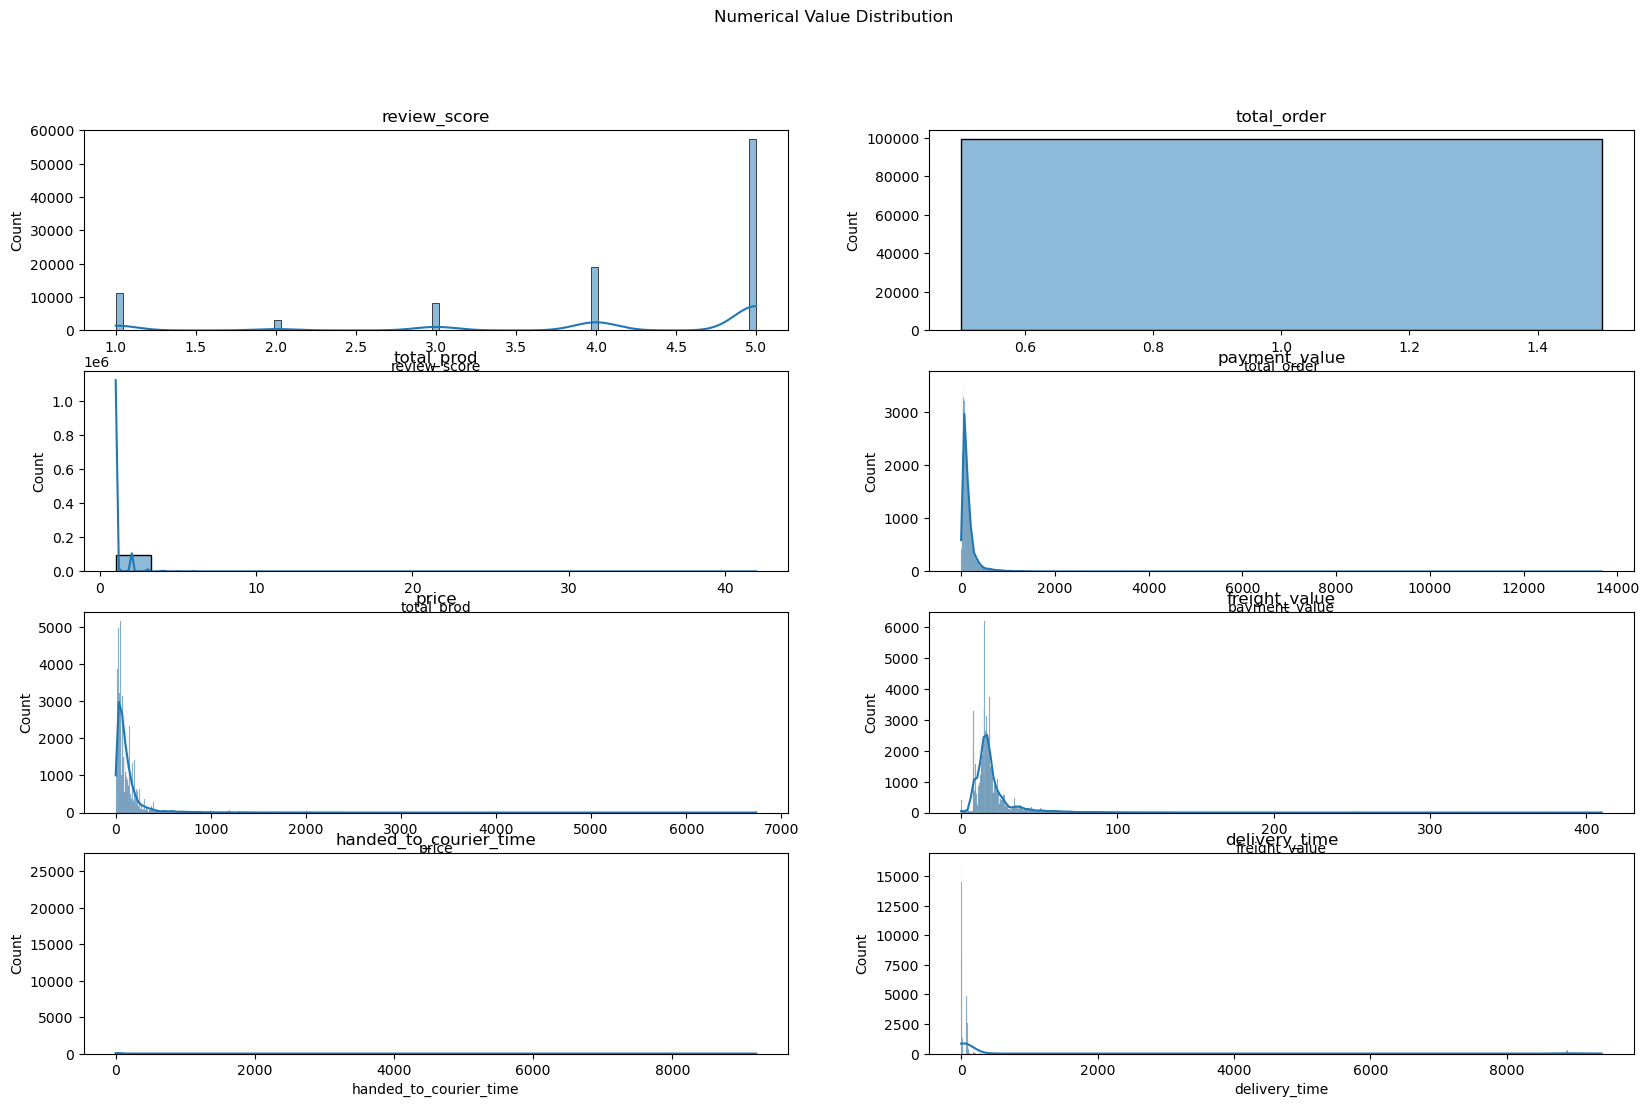

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(20, 12), sharey=False)
fig.suptitle('Numerical Value Distribution')

# review_score
sns.histplot(ax=axes[0][0], data=seller_cust_final, x='review_score', kde=True)
axes[0][0].set_title('review_score')

# total_order
sns.histplot(ax=axes[0][1], data=seller_cust_final, x='total_order', kde=True)
axes[0][1].set_title('total_order')

# total_prod
sns.histplot(ax=axes[1][0], data=seller_cust_final, x='total_prod', kde=True)
axes[1][0].set_title('total_prod')

# payment_value
sns.histplot(ax=axes[1][1], data=seller_cust_final, x='payment_value', kde=True)
axes[1][1].set_title('payment_value')

# price
sns.histplot(ax=axes[2][0], data=seller_cust_final, x='price', kde=True)
axes[2][0].set_title('price')

# freight_value
sns.histplot(ax=axes[2][1], data=seller_cust_final, x='freight_value', kde=True)
axes[2][1].set_title('freight_value')

# handed_to_courier_time
sns.histplot(ax=axes[3][0], data=seller_cust_final, x='handed_to_courier_time', kde=True)
axes[3][0].set_title('handed_to_courier_time')

# delivery_time
sns.histplot(ax=axes[3][1], data=seller_cust_final, x='delivery_time', kde=True)
axes[3][1].set_title('delivery_time')

### Normalize Values
* To change the shape distribution into normal distribution. <br>
* The range is between 0-1.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = MinMaxScaler()
seller_cust_final[['review_score', 'payment_value', 'price', 'freight_value', 'total_prod', 'handed_to_courier_time', 'delivery_time']] = scaler.fit_transform(seller_cust_final[['review_score', 'payment_value', 'price', 'freight_value', 'total_prod', 'handed_to_courier_time', 'delivery_time']])

In [ ]:
seller_cust_final.describe()

,review_score,payment_value,price,freight_value,total_prod,total_order,handed_to_courier_time,delivery_time
count,99246.000000,99246.000000,99246.000000,99246.000000,99246.000000,99246.0,99246.000000,99246.000000
mean,0.771971,0.011563,0.018475,0.049235,0.004444,1.0,0.007045,0.027630
std,0.336155,0.015880,0.028070,0.038801,0.017207,0.0,0.076043,0.147646
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.750000,0.004346,0.005962,0.032269,0.000000,1.0,0.000109,0.000745
50%,1.000000,0.007578,0.011605,0.039909,0.000000,1.0,0.000217,0.001278
75%,1.000000,0.012889,0.020648,0.051894,0.000000,1.0,0.000434,0.008731
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


### Categorical

In [ ]:
df_cat = df_eda_fin.select_dtypes(exclude='number')
df_cat.describe()

C:\Users\Milvin\AppData\Local\Temp\ipykernel_394260\705573634.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cat.describe()
C:\Users\Milvin\AppData\Local\Temp\ipykernel_394260\705573634.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cat.describe()
C:\Users\Milvin\AppData\Local\Temp\ipykernel_394260\705573634.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cat.descri

,seller_id,order_id,product_id,seller_state,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,product_category
count,97860,97860,97860,97860,97860,97860,97858,96868,96809,97860
unique,3042,96561,31502,23,8,28,96031,79256,94713,72
top,6560211a19b47992c3666cc44a7e94c0,cf5c8d9f52807cb2d2f0a0ff54c478da,aca2eb7d00ea1a7b8ebd4e68314663af,SP,delivered,SP,2018-08-24 13:04:05,2018-05-09 15:48:00,2018-08-30 19:11:50,bed_bath_table
freq,1838,5,429,69390,95770,41128,5,47,5,9500
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-08 10:34:01,2016-10-11 13:46:32,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-11 19:48:28,2018-10-17 13:22:46,NaN


* The data recorded from Sept 2016 until Sept 2018.
* There are 3,042 sellers from 23 states, with the top seller has got 1,838 orders.
* The sellers already served customers from 28 states.
* Total order is 96,561 with the highest total items in 1 order is 429.
* While there are 31,502 products purchased, the best-selling product_category is bed_bath_table with 9500 orders.
* 95.770/97.860 (~97.8%) order has been delivered.

## Outliers

In [ ]:
df_num_normal = seller_cust_final.select_dtypes(include='number')

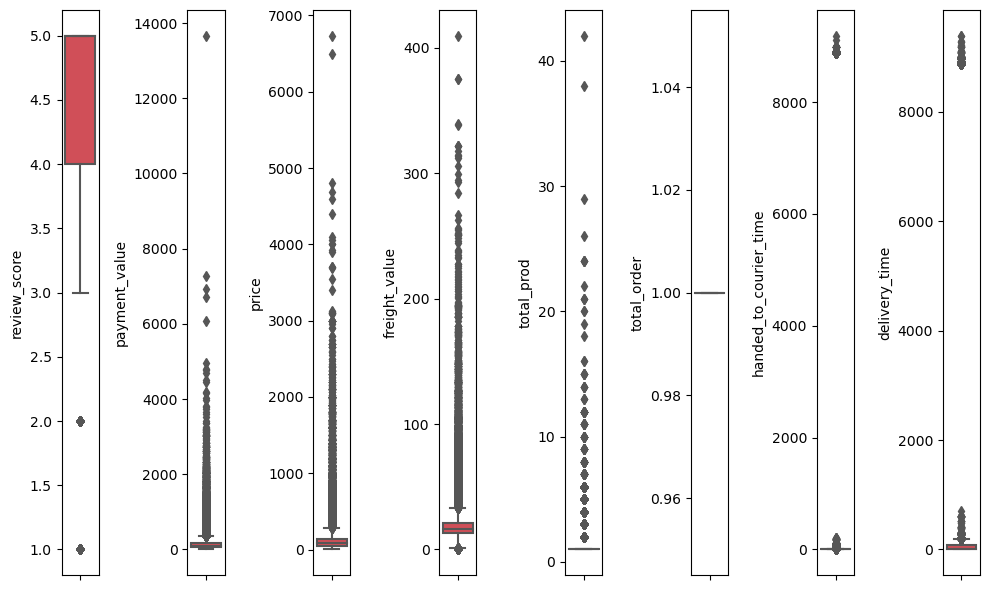

In [ ]:
# checking outliers from the columns
plt.figure(figsize=(10,6))

# plotting
features = list(df_num)
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_num[features[i]], color='#e63946')
    plt.tight_layout()

Outliers are to be kept for natural variation of data.

## EDA

### Feature engineering

In [ ]:
df_eda_fin['year'] = pd.DatetimeIndex(df_eda_fin['order_purchase_timestamp']).year
df_eda_fin['month'] = pd.DatetimeIndex(df_eda_fin['order_purchase_timestamp']).month
df_eda_fin.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,...,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,...,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances,2017.0,10.0
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances,2017.0,10.0
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances,2017.0,9.0
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,...,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools,2017.0,5.0
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,...,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools,2017.0,6.0


In [ ]:
df_eda_fin['month'].value_counts()

8.0     10769
5.0     10469
7.0     10231
3.0      9671
6.0      9391
4.0      9269
2.0      8268
1.0      7868
11.0     7377
12.0     5502
10.0     4847
9.0      4196
Name: month, dtype: int64

In [ ]:
df_eda_fin['month'].isnull().sum()

2

In [ ]:
df_eda_fin['year'].fillna(2018, inplace=True)
df_eda_fin['month'].fillna(8, inplace=True)

In [ ]:
df_eda_fin['year'] = df_eda_fin['year'].astype(int)
df_eda_fin['month'] = df_eda_fin['month'].astype(int)

In [ ]:
df_eda_fin.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,...,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,...,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances,2017,10
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances,2017,10
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances,2017,9
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,...,delivered,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools,2017,5
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,...,delivered,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools,2017,6


### Which state has the most buyer?

Text(0, 0.5, 'State')

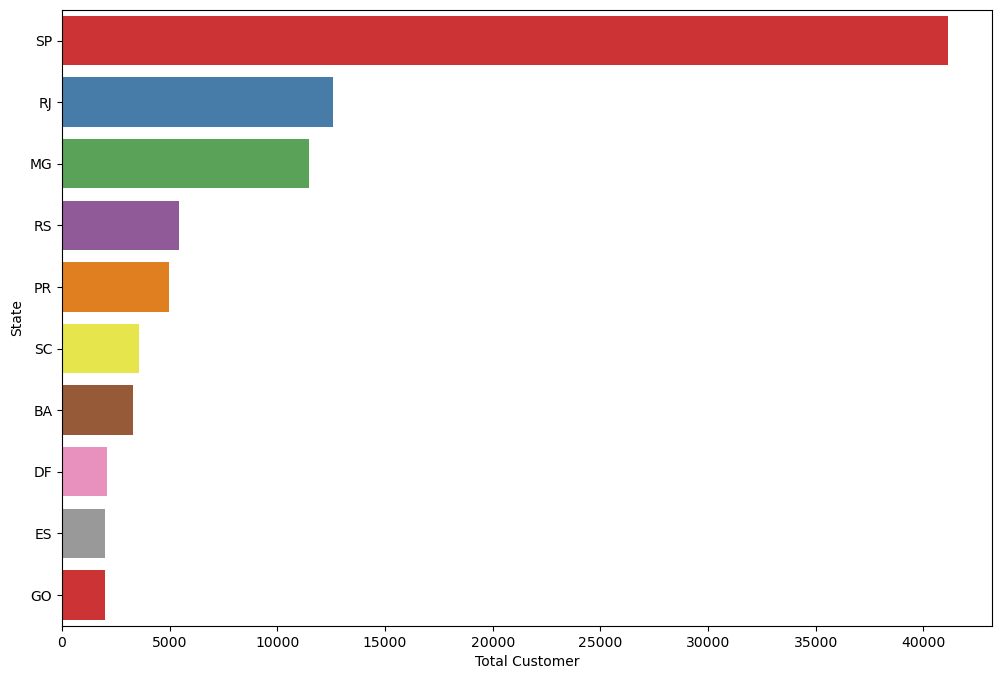

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_eda_fin['customer_state'], palette='Set1', order=df_eda_fin['customer_state'].value_counts().iloc[:10].index)
plt.xlabel('Total Customer')
plt.ylabel('State')

The state 'SP' has the highest total customer, more than twice of state 'RJ' on the second place. <br>
**What are best-seller products in state 'SP'?**

In [ ]:
## new dataframe for state 'SP'

df_SP = df_eda_fin[df_eda_fin['customer_state'] == 'SP']

Text(0, 0.5, 'Product Category')

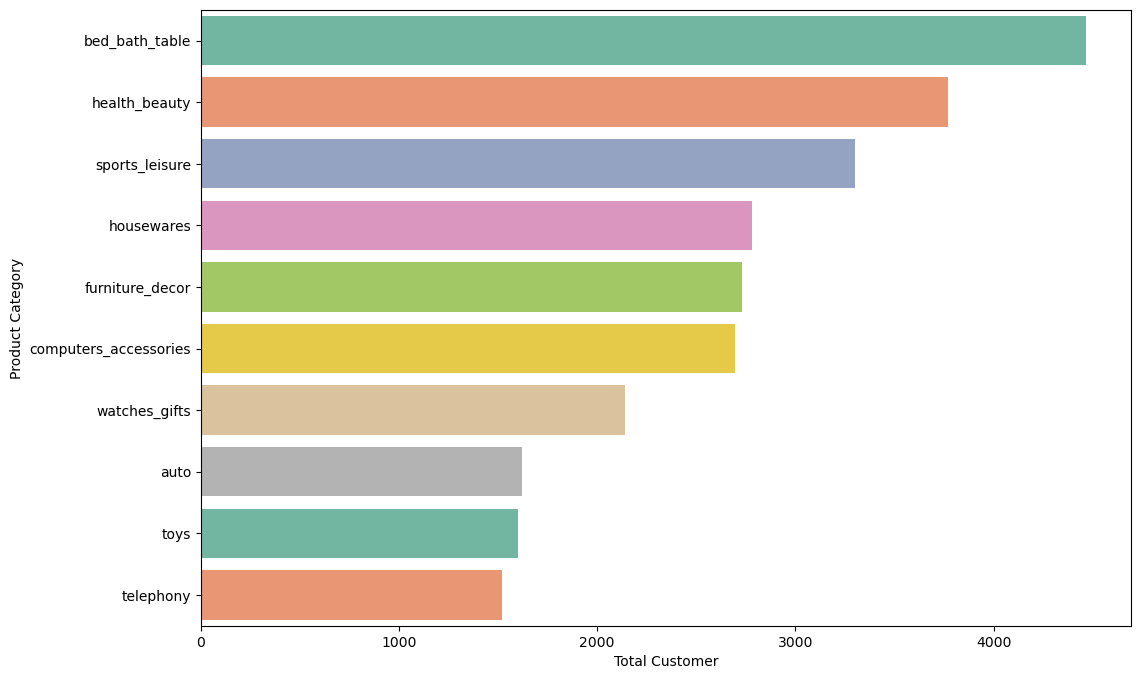

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_SP['product_category'], palette='Set2', order=df_SP['product_category'].value_counts().iloc[:10].index)
plt.xlabel('Total Customer')
plt.ylabel('Product Category')

Text(0, 0.5, 'Product Category')

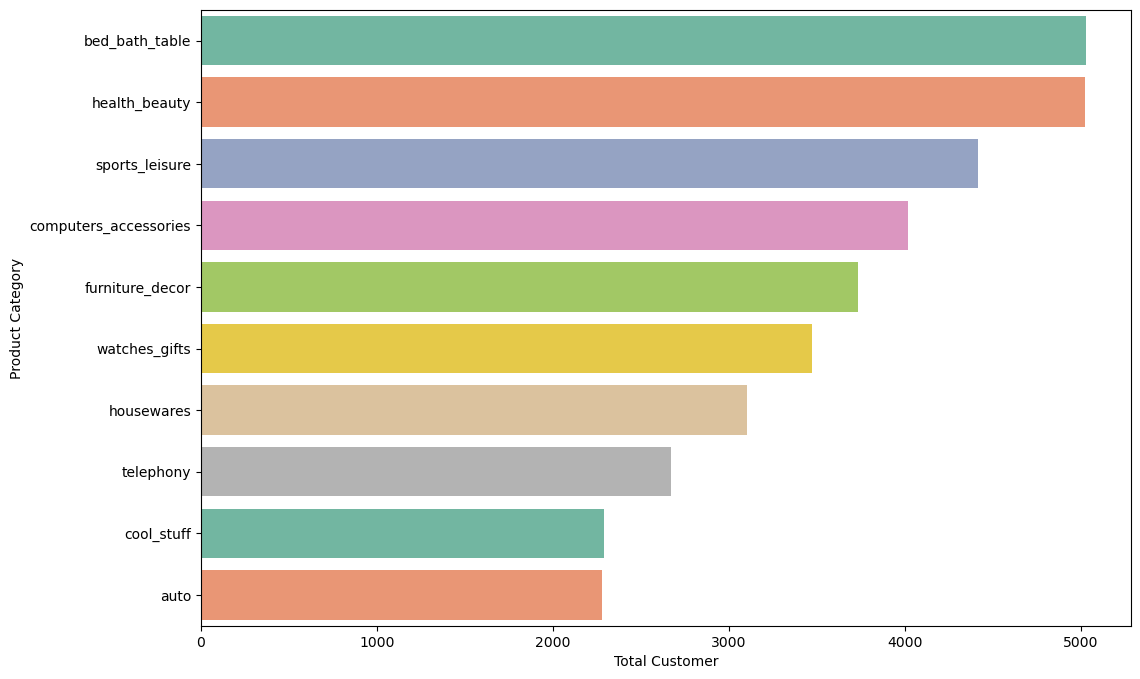

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_non_SP['product_category'], palette='Set2', order=df_non_SP['product_category'].value_counts().iloc[:10].index)
plt.xlabel('Total Customer')
plt.ylabel('Product Category')

### What is the top product?

Text(0, 0.5, 'Product Category')

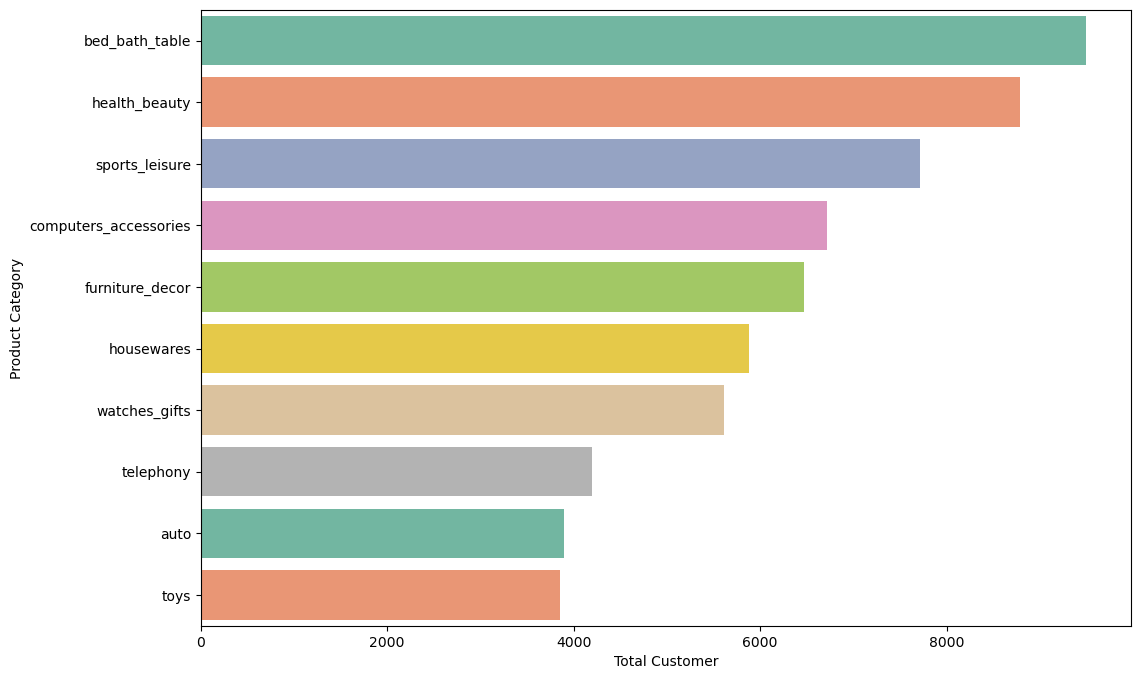

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_eda_fin['product_category'], palette='Set2', order=df_eda_fin['product_category'].value_counts().iloc[:10].index)
plt.xlabel('Total Customer')
plt.ylabel('Product Category')

Text(0, 0.5, 'Rating')

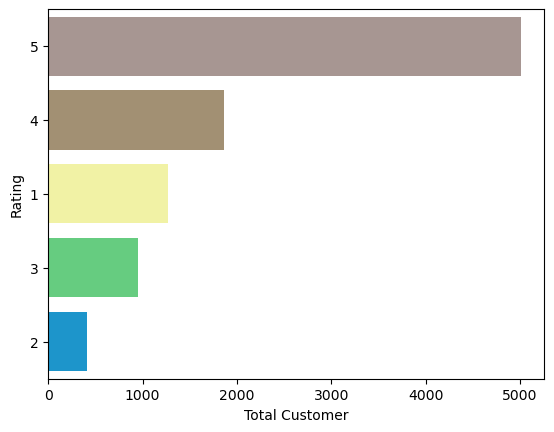

In [ ]:
# ratings for best product

df_bbb = df_eda_fin[df_eda_fin['product_category'] == 'bed_bath_table']
sns.countplot(y=df_bbb['review_score'], palette='terrain_r', order=df_bbb['review_score'].value_counts().index)
plt.xlabel('Total Customer')
plt.ylabel('Rating') 

In [ ]:
df_bbb.shape

(9500, 20)

Text(0, 0.5, 'Price')

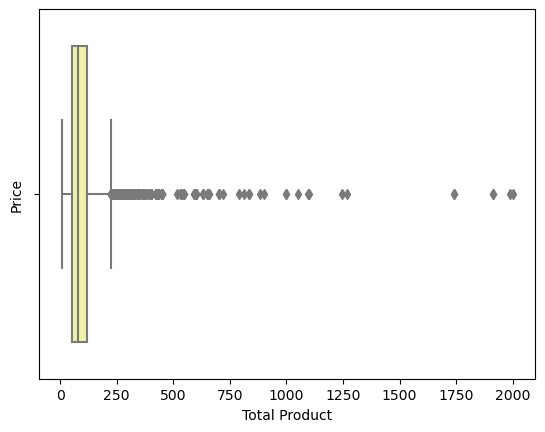

In [ ]:
sns.boxplot(x=df_bbb['price'], palette='terrain_r')
plt.xlabel('Total Product')
plt.ylabel('Price') 

Text(0, 0.5, 'Seller')

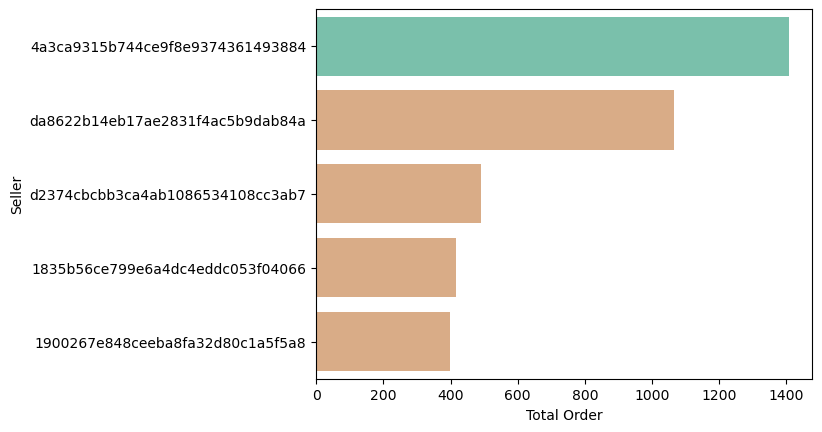

In [ ]:
sns.countplot(y=df_bbb['seller_id'], palette=['#6ECCAF','#E7AB79', '#E7AB79', '#E7AB79', '#E7AB79'], order=df_bbb['seller_id'].value_counts().iloc[:5].index)
plt.xlabel('Total Order')
plt.ylabel('Seller')

In [ ]:
df_prod_year = df_eda_fin.groupby(['year', 'product_category'])['total_order'].count().sort_values(ascending=False).reset_index()
df_prod_2018 = df_prod_year[df_prod_year['year'] == 2018].iloc[:5].reset_index()
df_prod_2017 = df_prod_year[df_prod_year['year'] == 2017].iloc[:5].reset_index()
df_prod_2016 = df_prod_year[df_prod_year['year'] == 2016].iloc[:5].reset_index()

In [ ]:
df_prod_al = df_prod_2018.append(df_prod_2017, ignore_index=True)
df_prod_all = df_prod_al.append(df_prod_2016, ignore_index=True)
df_prod_all

C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\2927950704.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_prod_al = df_prod_2018.append(df_prod_2017, ignore_index=True)
C:\Users\Milvin\AppData\Local\Temp\ipykernel_26248\2927950704.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_prod_all = df_prod_al.append(df_prod_2016, ignore_index=True)


,index,year,product_category,total_order
0,0,2018,health_beauty,5382
1,1,2018,bed_bath_table,4998
2,3,2018,computers_accessories,4082
3,4,2018,sports_leisure,4063
4,6,2018,watches_gifts,3485
5,2,2017,bed_bath_table,4497
6,5,2017,sports_leisure,3633
7,8,2017,health_beauty,3367
8,10,2017,furniture_decor,3192
9,11,2017,computers_accessories,2613


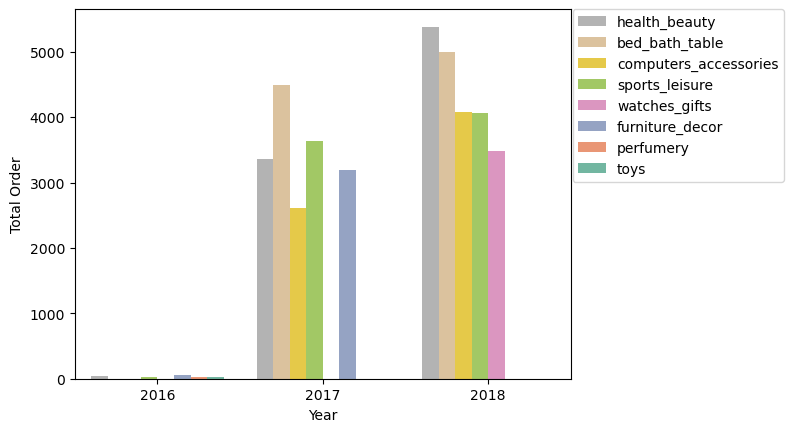

In [ ]:
sns.barplot(data=df_prod_all, x='year', y='total_order', palette='Set2_r', hue='product_category')
plt.xlabel('Year')
plt.ylabel('Total Order')
plt.legend(bbox_to_anchor=(1.43, 1), loc='upper right', borderaxespad=0)

### Order & Payment per year

In [ ]:
from datetime import datetime
d = datetime.now()

df_eda_fin['date'] = [d.date() for d in df_eda_fin['order_purchase_timestamp']]

In [ ]:
df_eda_fin.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,...,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month,date
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,...,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances,2017,10,2017-10-18
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances,2017,10,2017-10-12
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,...,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances,2017,9,2017-09-26
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,...,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools,2017,5,2017-05-11
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,...,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools,2017,6,2017-06-08


In [ ]:
def monthly_order(data):
    monthly_data = data.copy()
    monthly_data['date'] = monthly_data['date'].apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('date')['total_order'].sum().reset_index()
    monthly_data['date'] = pd.to_datetime(monthly_data['date'])
    return monthly_data

In [ ]:
monthly_df = monthly_order(df_eda_fin)
monthly_df

,date,total_order
0,NaT,2
1,2016-09-01,2
2,2016-10-01,305
3,2016-12-01,1
4,2017-01-01,773
5,2017-02-01,1685
6,2017-03-01,2576
7,2017-04-01,2329
8,2017-05-01,3575
9,2017-06-01,3165


In [ ]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data['date'] = monthly_data['date'].apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('date')['price'].sum().reset_index()
    monthly_data['date'] = pd.to_datetime(monthly_data['date'])
    return monthly_data

monthly_df1 = monthly_sales(df_eda_fin)
monthly_df1

,date,price
0,NaT,175.00
1,2016-09-01,99.49
2,2016-10-01,44702.93
3,2016-12-01,10.90
4,2017-01-01,105593.02
5,2017-02-01,221071.46
6,2017-03-01,336145.37
7,2017-04-01,323967.06
8,2017-05-01,452106.10
9,2017-06-01,400325.58


Text(0, 0.5, 'Total Sales')

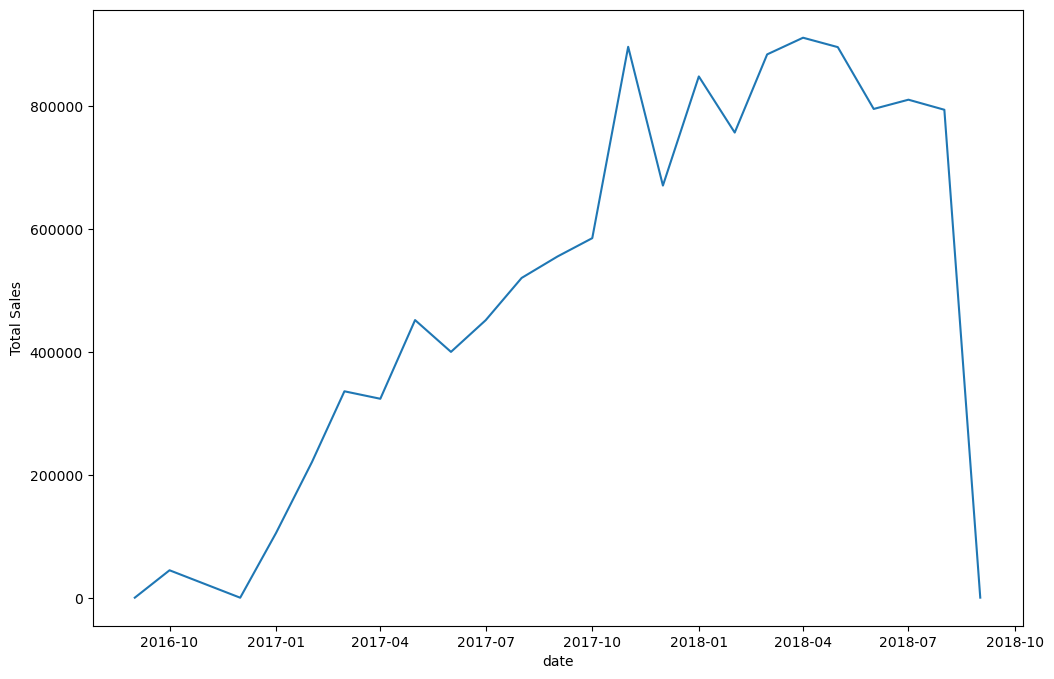

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=monthly_df, x='date', y='price', palette='deep')
plt.ylabel('Total Sales')

In [ ]:
df_price = df_eda_fin.groupby(['year', 'month'])['price'].sum().reset_index()
df_price

,year,month,price
0,2016,9,99.49
1,2016,10,44702.93
2,2016,12,10.90
3,2017,1,105593.02
4,2017,2,221071.46
5,2017,3,336145.37
6,2017,4,323967.06
7,2017,5,452106.10
8,2017,6,400325.58
9,2017,7,451966.25


In [ ]:
df_order1 = df_eda_fin.groupby('date')['total_order'].sum().reset_index()
df_order1

,date,total_order
0,2016-09-04,1
1,2016-09-05,1
2,2016-10-02,1
3,2016-10-03,8
4,2016-10-04,59
...,...,...
610,2018-08-26,74
611,2018-08-27,64
612,2018-08-28,40
613,2018-08-29,11


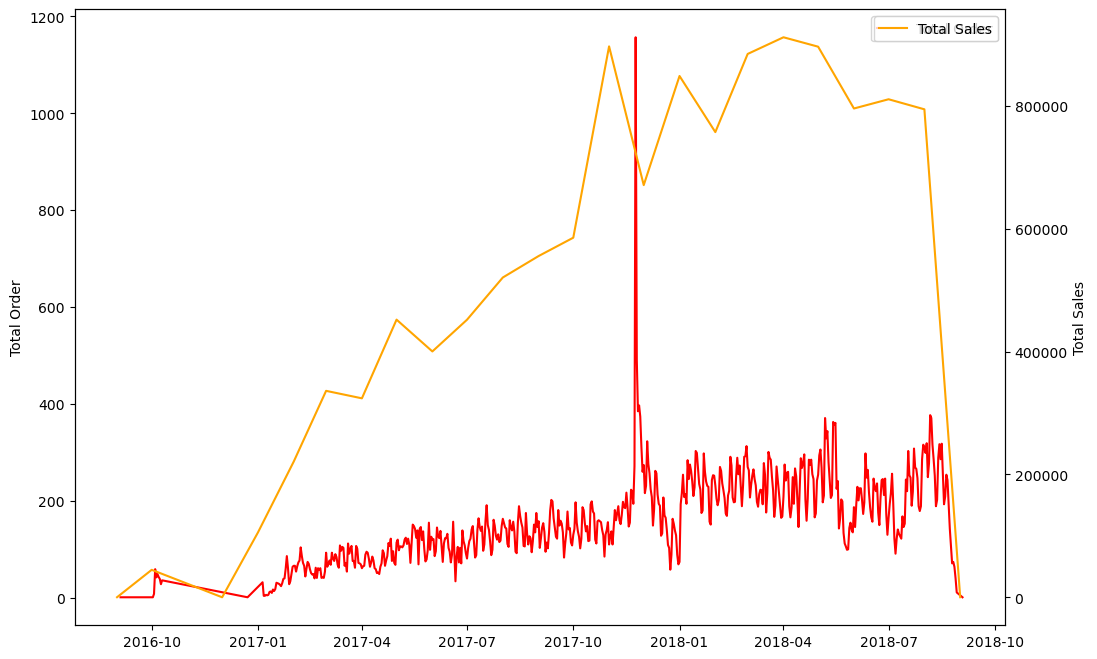

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df_order1['date'], df_order1['total_order'], color='r', label='Total Order')
plt.ylabel('Total Order')      
plt.legend()

axes2 = plt.twinx()
axes2.plot(monthly_df['date'], monthly_df['price'], color='orange', label='Total Sales')
axes2.set_ylabel('Total Sales')
plt.legend()
plt.show()

In [ ]:
df_order = df_eda_fin.groupby(['year', 'month'])['total_order'].sum().reset_index()
df_order

,year,month,total_order
0,2016,9,2
1,2016,10,305
2,2016,12,1
3,2017,1,773
4,2017,2,1685
5,2017,3,2576
6,2017,4,2329
7,2017,5,3575
8,2017,6,3165
9,2017,7,3952


Text(0, 0.5, 'Total Sales')

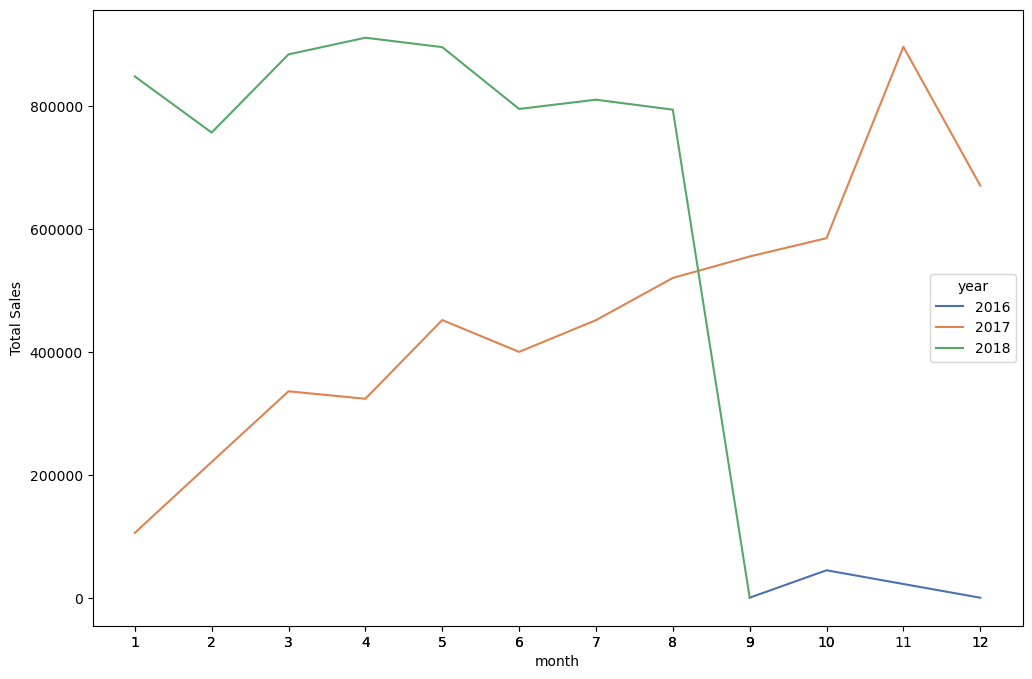

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=df_price, x='month', y='price', hue='year', palette='deep')
ax.set(xticks=df_price.month.values)
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Order')

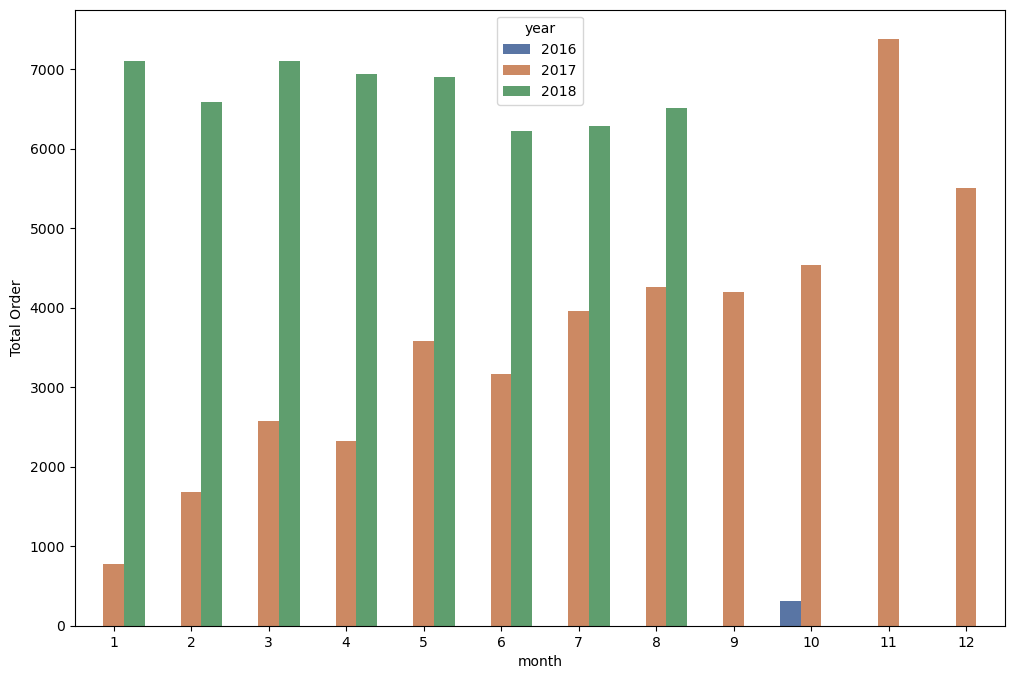

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_order, x='month', y='total_order', hue='year', palette='deep')
plt.ylabel('Total Order')

### Which State Has the Most Sellers?

<AxesSubplot:xlabel='seller_state'>

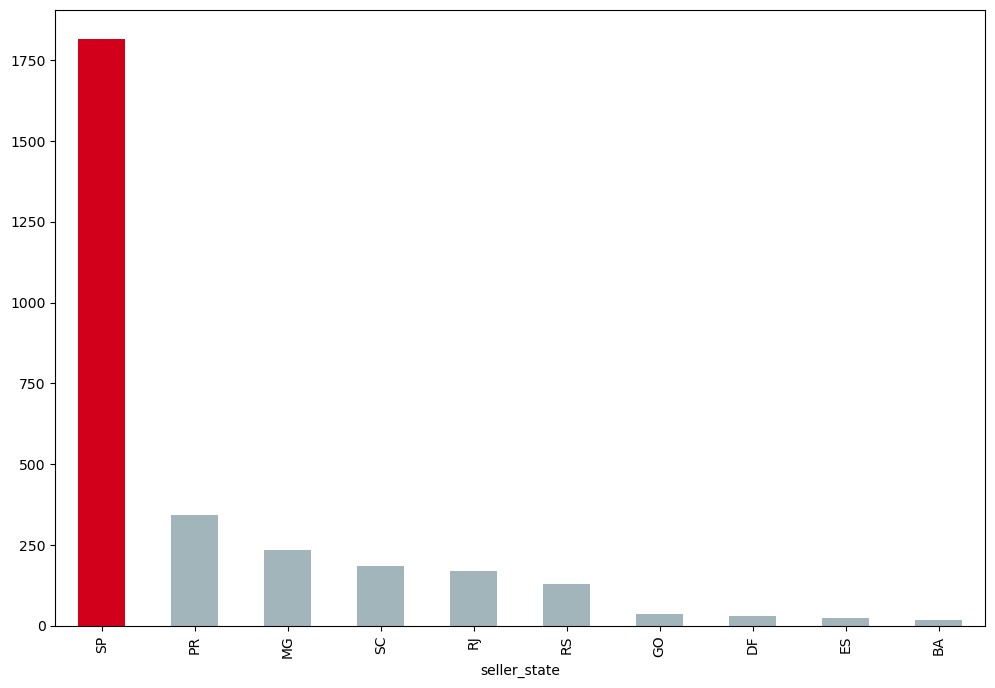

In [ ]:
plt.figure(figsize=(12,8))
df_eda_fin.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False).iloc[:10].plot(kind='bar', color=('#D2001A', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB'))


### What Product Does Most Sellers Are Selling?

In [ ]:
df_prod_sell = df_eda_fin.groupby(['product_category']).agg(
    total_seller = ('seller_id', 'nunique')
).sort_values(by='total_seller', ascending=False).reset_index()

df_prod_sell.head(10)

,product_category,total_seller
0,health_beauty,491
1,sports_leisure,481
2,housewares,467
3,auto,381
4,furniture_decor,369
5,computers_accessories,287
6,cool_stuff,263
7,toys,251
8,baby,242
9,garden_tools,235


Text(0.5, 0, 'Product Category')

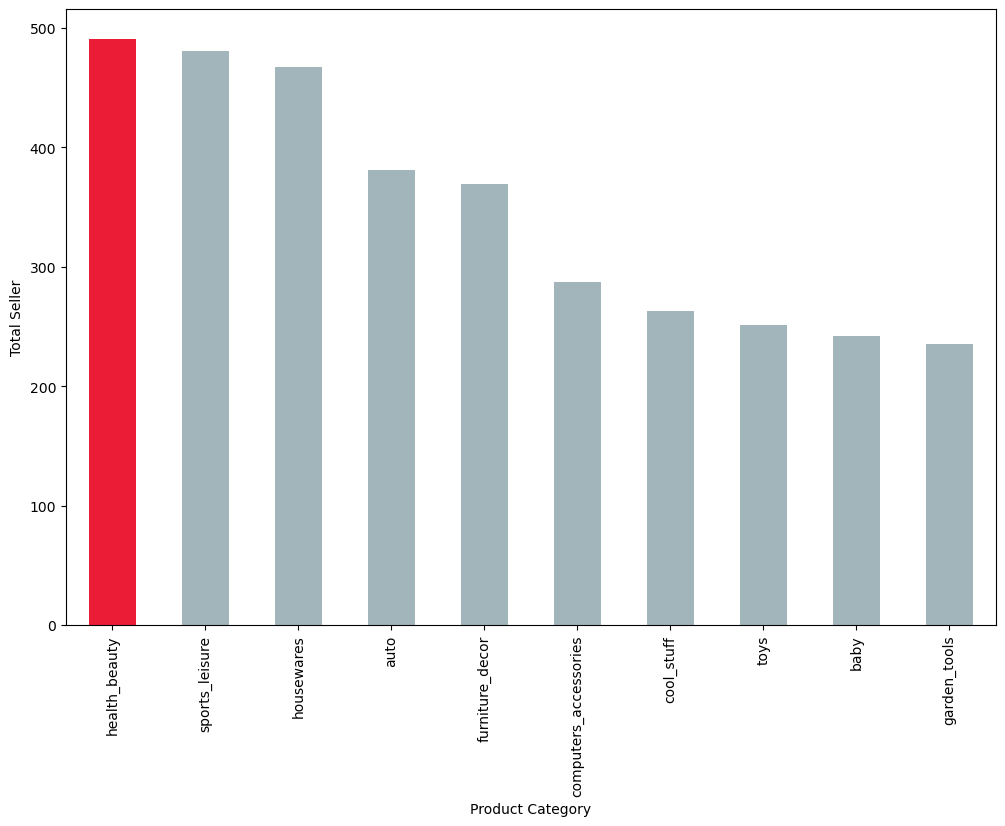

In [ ]:
plt.figure(figsize=(12,8))
df_prod_sell.groupby('product_category')['total_seller'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar', color=('#EB1D36', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB'))
plt.ylabel('Total Seller')
plt.xlabel('Product Category')

### What are the characteristics of top seller?

Text(0, 0.5, 'Total Order')

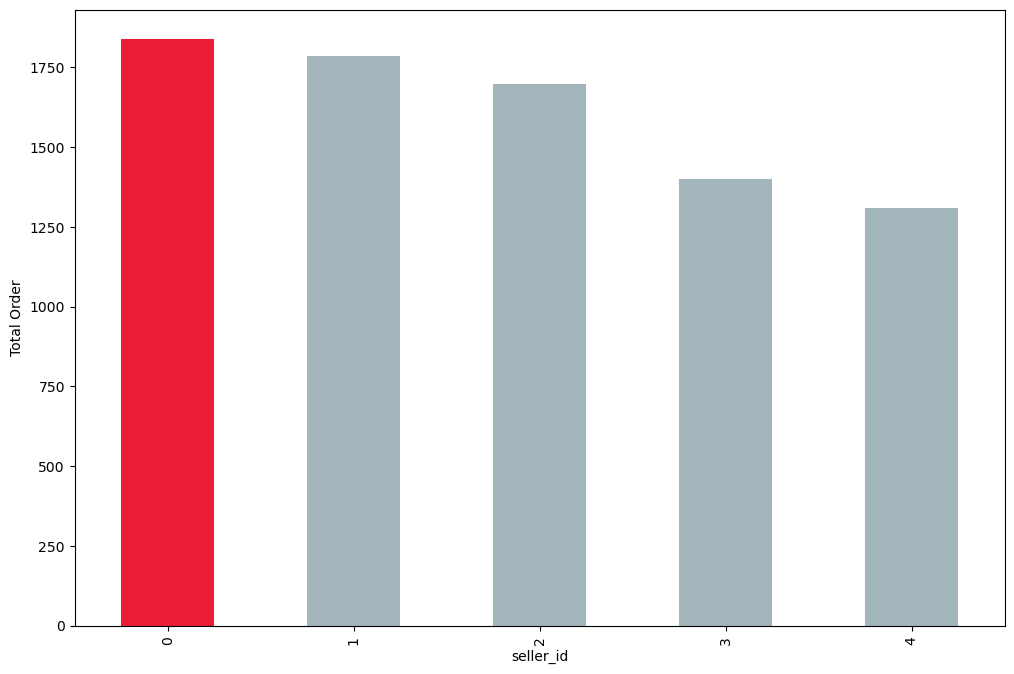

In [ ]:
plt.figure(figsize=(12,8))
df_eda_fin.groupby('seller_id')['total_order'].sum().sort_values(ascending=False).iloc[:5].plot(kind='bar', color=('#EB1D36', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB', '#A2B5BB'), xticks=[0, 1, 2, 3, 4])
plt.ylabel('Total Order')

In [ ]:
df_eda_fin.groupby('seller_id')['total_order'].sum().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    1838
4a3ca9315b744ce9f8e9374361493884    1785
cc419e0650a3c5ba77189a1882b7556a    1698
1f50f920176fa81dab994f9023523100    1399
da8622b14eb17ae2831f4ac5b9dab84a    1308
                                    ... 
dadc51ef321949ec9a3ab25cd902e23d       1
0f94588695d71662beec8d883ffacf09       1
6e85dc5ecd97a61094b89b046a509d8e       1
0f80a40c312b2472dca482cf50f5186f       1
43753b27d77860f1654aa72e251a7878       1
Name: total_order, Length: 3042, dtype: int64

In [ ]:
df_top_seller = df_eda_fin[df_eda_fin['seller_id'] == '6560211a19b47992c3666cc44a7e94c0']
df_top_seller.groupby(['order_status']).agg(
    median_review_score = ('review_score', 'median'),
    median_payment_value = ('payment_value', 'median'),
    median_price_per_item = ('price', 'median'),
    median_freight_value = ('freight_value', 'median'),
    median_handed_to_courier_time = ('handed_to_courier_time', 'median'),
    median_delivery_time = ('delivery_time', 'median'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum'),
)

,median_review_score,median_payment_value,median_price_per_item,median_freight_value,median_handed_to_courier_time,median_delivery_time,total_prod,total_order
order_status,,,,,,,,
canceled,1.0,81.89,58.0,16.89,2.0,0.0,8,7
delivered,5.0,67.44,49.0,14.10,1.0,9.0,2076,1805
invoiced,2.0,93.97,69.0,24.97,0.0,0.0,3,3
shipped,1.0,72.32,56.0,14.76,2.0,2.0,24,23


In [ ]:
df_top_seller.groupby('year')['total_order'].sum().reset_index()

,year,total_order
0,2017,846
1,2018,992


In [ ]:
df_tops = df_top_seller.groupby('product_category')['total_order'].sum().sort_values(ascending=False).reset_index()
df_tops

,product_category,total_order
0,watches_gifts,1454
1,fashion_bags_accessories,323
2,audio,30
3,computers_accessories,12
4,perfumery,11
5,sports_leisure,7
6,construction_tools_safety,1


Text(0, 0.5, 'Product Category')

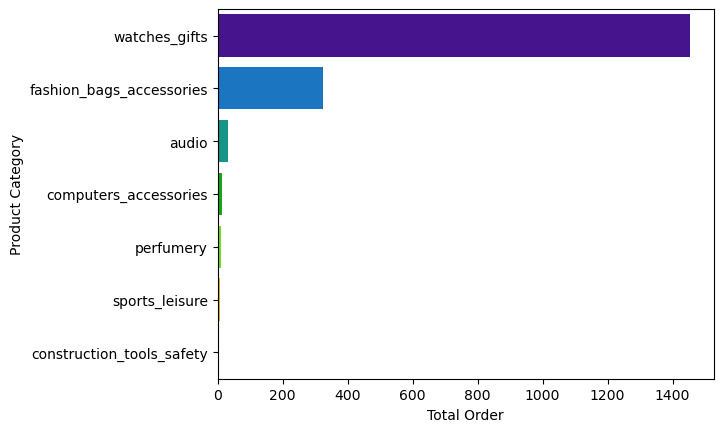

In [ ]:
sns.barplot(data=df_tops, y='product_category', x='total_order', palette='nipy_spectral')
plt.xlabel('Total Order')
plt.ylabel('Product Category')

### Correlation

<AxesSubplot:>

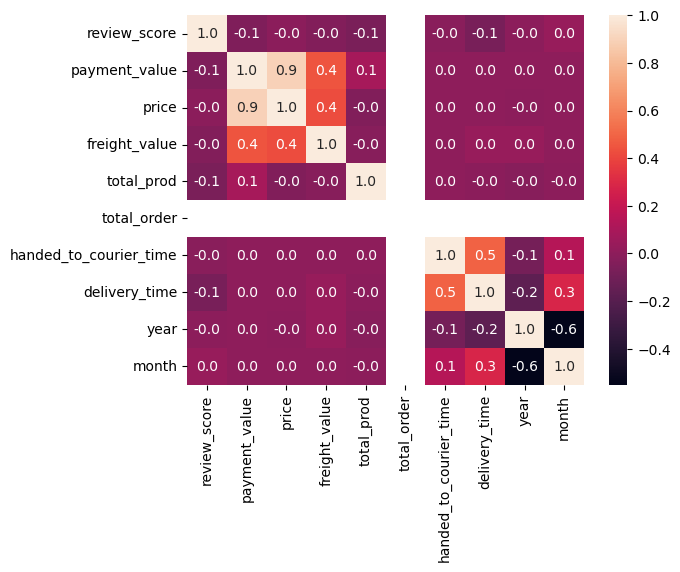

In [ ]:
df_corr = df_eda_fin.corr()
sns.heatmap(df_corr, annot=True, fmt='.1f')

## Grouping by Seller

In [ ]:
df_eda_fin.groupby(['seller_id', 'order_status']).agg(
    avg_review_score = ('review_score', 'mean'),
    avg_payment_value = ('payment_value', 'mean'),
    avg_price_per_item = ('price', 'mean'),
    avg_freight_value = ('freight_value', 'mean'),
    avg_handed_to_courier_time = ('handed_to_courier_time', 'mean'),
    avg_delivery_time = ('delivery_time', 'mean'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum')
)

avg_review_score  \
seller_id                        order_status                     
0015a82c2db000af6aaaf3ae2ecb0532 delivered             3.666667   
001cca7ae9ae17fb1caed9dfb1094831 delivered             4.062500   
                                 shipped               1.000000   
001e6ad469a905060d959994f1b41e4f canceled              1.000000   
002100f778ceb8431b7a1020ff7ab48f delivered             3.960000   
...                                                         ...   
fffd5413c0700ac820c7069d66d98c89 delivered             3.892857   
                                 shipped               4.000000   
ffff564a4f9085cd26170f4732393726 canceled              1.500000   
                                 delivered             3.250000   
                                 processing            1.250000   

                                               avg_payment_value  \
seller_id                        order_status                      
0015a82c2db000af6aaaf3ae2ecb0532 delivered            916.020000   
001cca7ae9ae17fb1caed9dfb1094831 delivered            170.113438   
                                 shipped              158.254000   
001e6ad469a905060d959994f1b41e4f canceled             267.940000   
002100f778ceb8431b7a1020ff7ab48f delivered             41.614200   
...                                                          ...   
fffd5413c0700ac820c7069d66d98c89 delivered            195.955714   
                                 shipped              318.485000   
ffff564a4f9085cd26170f4732393726 canceled             168.577500   
                                 delivered             59.293750   
                                 processing            77.775000   

                                               avg_price_per_item  \
seller_id                        order_status                       
0015a82c2db000af6aaaf3ae2ecb0532 delivered             895.000000   
001cca7ae9ae17fb1caed9dfb1094831 delivered             104.851250   
                                 shipped               118.600000   
001e6ad469a905060d959994f1b41e4f canceled              250.000000   
002100f778ceb8431b7a1020ff7ab48f delivered              22.940000   
...                                                           ...   
fffd5413c0700ac820c7069d66d98c89 delivered             145.869643   
                                 shipped               213.750000   
ffff564a4f9085cd26170f4732393726 canceled              148.662500   
                                 delivered              44.875000   
                                 processing             59.081250   

                                               avg_freight_value  \
seller_id                        order_status                      
0015a82c2db000af6aaaf3ae2ecb0532 delivered             21.020000   
001cca7ae9ae17fb1caed9dfb1094831 delivered             37.530052   
                                 shipped               39.654000   
001e6ad469a905060d959994f1b41e4f canceled              17.940000   
002100f778ceb8431b7a1020ff7ab48f delivered             14.493200   
...                                                          ...   
fffd5413c0700ac820c7069d66d98c89 delivered             43.676964   
                                 shipped              104.735000   
ffff564a4f9085cd26170f4732393726 canceled              19.915000   
                                 delivered             14.418750   
                                 processing            18.693750   

                                               avg_handed_to_courier_time  \
seller_id                        order_status                               
0015a82c2db000af6aaaf3ae2ecb0532 delivered                       3.333333   
001cca7ae9ae17fb1caed9dfb1094831 delivered                      53.859375   
                                 shipped                         2.000000   
001e6ad469a905060d959994f1b41e4f canceled                             NaN   
002100f778ceb8431b7a1020ff7ab48f delivered   

In [ ]:
group_sc = df_eda_fin.groupby(['seller_id']).agg(
    median_review_score = ('review_score', 'median'),
    median_payment_value = ('payment_value', 'median'),
    median_price_per_item = ('price', 'median'),
    median_freight_value = ('freight_value', 'median'),
    median_handed_to_courier_time = ('handed_to_courier_time', 'median'),
    median_delivery_time = ('delivery_time', 'median'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum')
).reset_index()

group_sc.head()

,seller_id,median_review_score,median_payment_value,median_price_per_item,median_freight_value,median_handed_to_courier_time,median_delivery_time,total_prod,total_order
0,0015a82c2db000af6aaaf3ae2ecb0532,5.0,916.02,895.00,21.02,3.0,12.0,3,3
1,001cca7ae9ae17fb1caed9dfb1094831,5.0,144.99,99.00,36.93,2.0,14.0,238,197
2,001e6ad469a905060d959994f1b41e4f,1.0,267.94,250.00,17.94,0.0,0.0,1,1
3,002100f778ceb8431b7a1020ff7ab48f,5.0,33.00,17.90,15.10,4.0,19.0,59,51
4,004c9cd9d87a3c30c522c48c4fc07416,5.0,130.32,109.99,17.83,1.0,16.5,169,144


In [ ]:
group_sc.drop(columns='seller_id', inplace=True)

In [ ]:
group_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   median_review_score            3042 non-null   float64
 1   median_payment_value           3042 non-null   float64
 2   median_price_per_item          3042 non-null   float64
 3   median_freight_value           3042 non-null   float64
 4   median_handed_to_courier_time  3042 non-null   float64
 5   median_delivery_time           3042 non-null   float64
 6   total_prod                     3042 non-null   int64  
 7   total_order                    3042 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 190.2 KB


<AxesSubplot:>

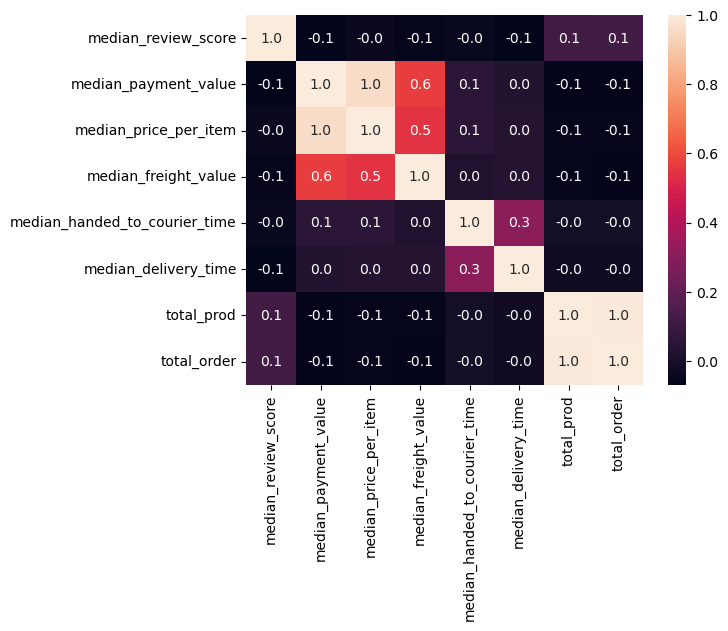

In [ ]:
gr_corr = group_sc.corr()
sns.heatmap(gr_corr, annot=True, fmt='.1f')

## Customer Segmentation (Non-SP)

In [ ]:
df_non_SP = df_eda_fin[df_eda_fin['customer_state'] != 'SP']
df_non_SP.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,customer_id,order_status,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month,date
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,a2ff5a97bf95719e38ea2e3b4105bce8,1,916.02,895.0,21.02,1,1,SP,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,MG,2017-10-18 08:16:34,2017-10-20 14:29:01,2017-10-27 16:46:05,2.0,9.0,small_appliances,2017,10,2017-10-18
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,d9442164acf4b03109425633efaa0cfc,delivered,MG,2017-10-12 13:33:22,2017-10-17 15:42:42,2017-10-24 20:17:44,5.0,12.0,small_appliances,2017,10,2017-10-12
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,a2ff5a97bf95719e38ea2e3b4105bce8,5,916.02,895.0,21.02,1,1,SP,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,PR,2017-09-26 22:17:05,2017-09-29 15:53:03,2017-10-07 16:12:47,3.0,81.0,small_appliances,2017,9,2017-09-26
6,001cca7ae9ae17fb1caed9dfb1094831,03c765107c8fc34c68a82bbd6c686856,e251ebd2858be1aa7d9b2087a6992580,5,126.95,112.0,14.95,1,1,ES,f28dead4549d1753510b2f16df5724c8,delivered,RJ,2017-04-09 20:15:45,2017-04-10 12:26:52,2017-04-17 12:04:56,1.0,8.0,garden_tools,2017,4,2017-04-09
10,001cca7ae9ae17fb1caed9dfb1094831,07dba073c2b18c2c748f28ed51c87ee8,08574b074924071f4e201e151b152b4e,5,147.01,101.0,46.01,1,1,ES,39fd6d063a9335b98a5045cada7081dc,delivered,SC,2018-02-08 21:14:22,2018-02-14 21:45:16,2018-03-09 01:19:23,6.0,101.0,garden_tools,2018,2,2018-02-08


In [ ]:
df_non_SP1 = df_non_SP.groupby(['customer_id', 'order_status']).agg(
    med_review_score = ('review_score', 'median'),
    med_payment_value = ('payment_value', 'median'),
    med_price_per_item = ('price', 'median'),
    med_freight_value = ('freight_value', 'median'),
    med_handed_to_courier_time = ('handed_to_courier_time', 'median'),
    med_delivery_time = ('delivery_time', 'median'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum')
).reset_index()

In [ ]:
df_non_SP1.drop(columns=['customer_id'], inplace=True)                

In [ ]:
df_non_SP1.head()

,order_status,med_review_score,med_payment_value,med_price_per_item,med_freight_value,med_handed_to_courier_time,med_delivery_time,total_prod,total_order
0,0,4.5,98.895,87.50,11.395,0.0,0.0,2,2
1,delivered,4.0,67.410,54.90,12.510,3.0,9.0,1,1
2,delivered,5.0,195.420,179.99,15.430,73.0,78.0,1,1
3,delivered,5.0,179.350,149.90,29.450,3.0,97.0,1,1
4,delivered,1.0,49.400,34.30,15.100,5.0,115.0,1,1


In [ ]:
df_non_SP1 = pd.get_dummies(df_non_SP1, columns = ['order_status'])

Text(0, 0.5, 'WCSS')

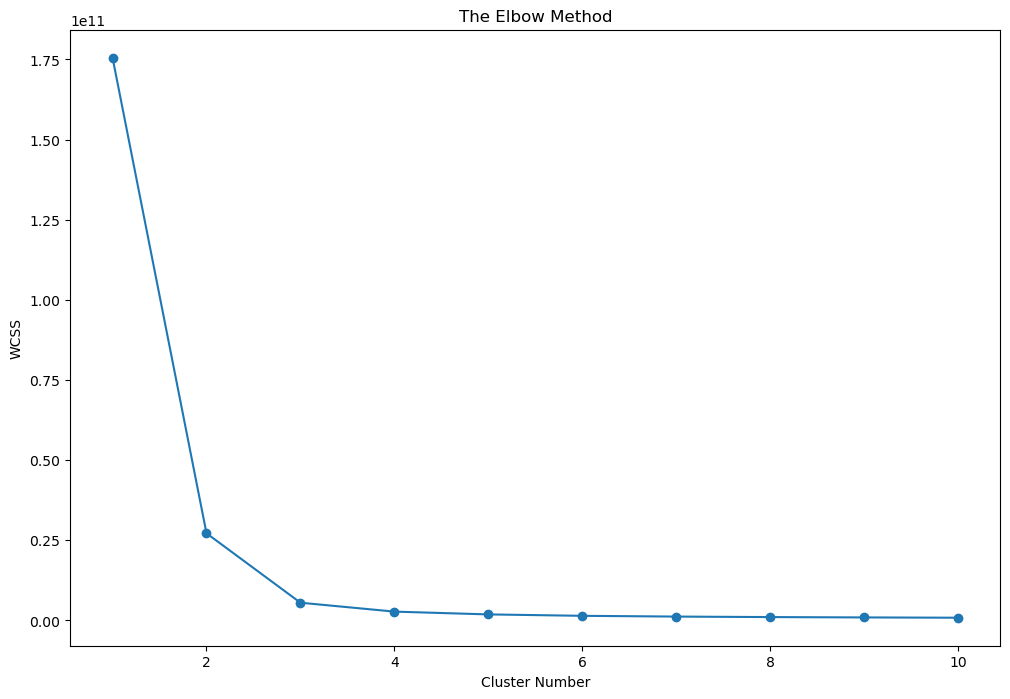

In [ ]:
#Scale
from sklearn.preprocessing import StandardScaler

df_scale = df_non_SP1
sc = StandardScaler()
df_scale_fit = sc.fit_transform(df_scale)
new_df = pd.DataFrame(data=df_non_SP1)

#Elbow Method
from sklearn.cluster import KMeans

wcss = []
for x in range (1,11):
  kmeans = KMeans(n_clusters = x, init='k-means++', random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')



In [ ]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(df_non_SP1.astype(float))

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_std)

In [ ]:
df_data_std = pd.DataFrame(data=data_std, columns=list(df_non_SP1))

In [ ]:
df_data_std['clusters'] = kmeans.labels_
df_non_SP1['clusters'] = kmeans.labels_

In [ ]:
# PCA
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_data_std)
pcs = pca.transform(df_data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_non_SP1['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,3.001759,-8.073394,0
1,-0.818680,-0.205261,1
2,-0.218058,0.361935,1
3,-0.022479,0.465488,1
4,-0.506941,-0.785717,1


In [ ]:
data_pca['clusters'].value_counts()

1    54423
0     1580
Name: clusters, dtype: int64

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

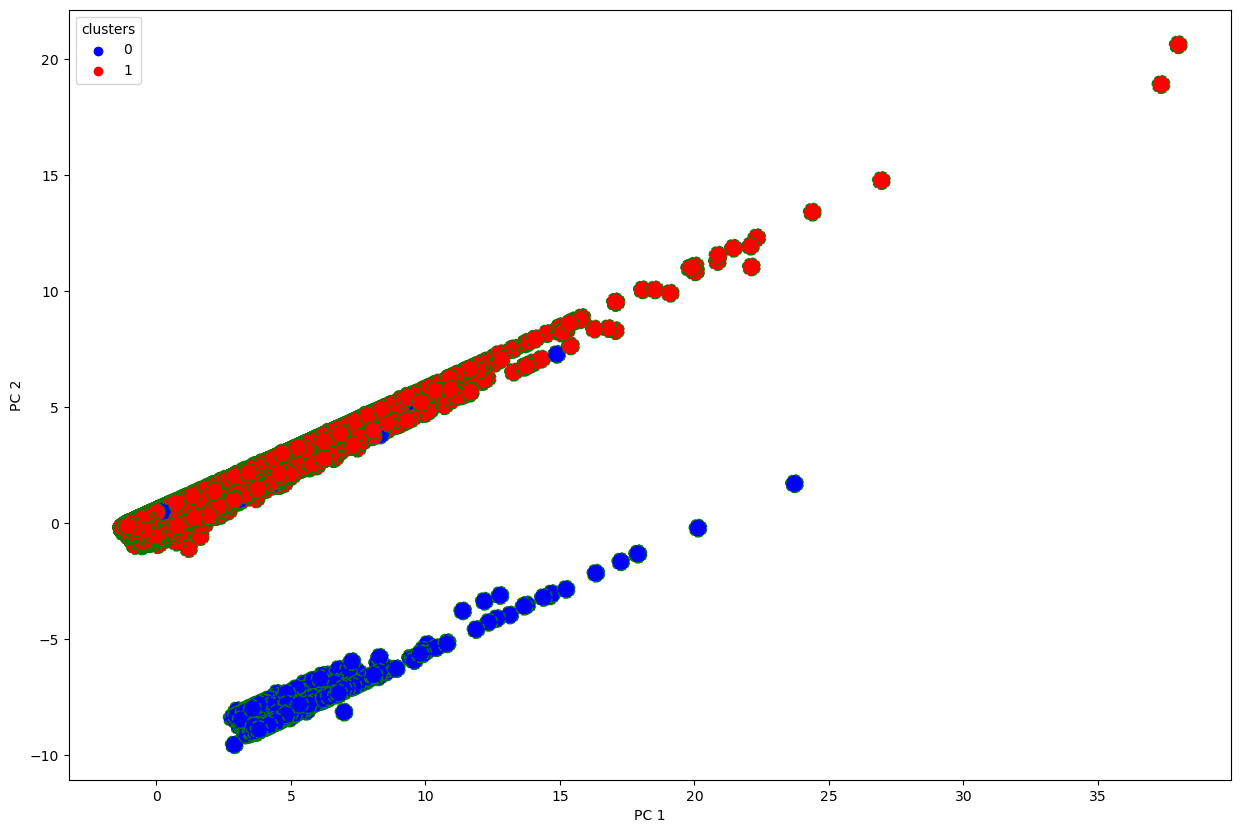

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red'],
    s=160,
    ax=ax
)

In [ ]:
pd.set_option('display.max_columns', 500)
display(df_non_SP1.groupby('clusters').agg(['mean','median']))

med_review_score        med_payment_value           \
                     mean median              mean   median   
clusters                                                      
0                2.192722    1.0        200.045934  115.165   
1                4.093178    5.0        168.054183  110.550   

         med_price_per_item        med_freight_value         \
                       mean median              mean median   
clusters                                                      
0                164.384633  89.90         25.472440  18.25   
1                132.856784  82.99         23.700565  18.28   

         med_handed_to_courier_time        med_delivery_time         \
                               mean median              mean median   
clusters                                                              
0                       1888.741772    2.0       1887.151899    2.0   
1                          9.720477    2.0        301.036790   18.0   

         total_prod        total_order        order_status_0         \
               mean median        mean median           mean median   
clusters                                                              
0          1.166456    1.0    1.001899    1.0       0.000633    0.0   
1          1.194495    1.0    1.013340    1.0       0.000000    0.0   

         order_status_approved        order_status_canceled         \
                          mean median                  mean median   
clusters                                                             
0                     0.000633    0.0              0.129114    0.0   
1                     0.000000    0.0              0.000000    0.0   

         order_status_delivered        order_status_invoiced         \
                           mean median                  mean median   
clusters                                                              
0                      0.208861    0.0              0.096835    0.0   
1                      1.000000    1.0              0.000000    0.0   

         order_status_processing        order_status_shipped         \
                            mean median                 mean median   
clusters                                                              
0                       0.101899    0.0             0.460127    0.0   
1                       0.000000    0.0             0.000000    0.0   

         order_status_unavailable         
                             mean median  
clusters                                  
0                        0.001899    0.0  
1                        0.000000    0.0

The purchase between cluster is not that different. But the customer in cluster 0 rate the seller lower than those in cluster 1, in which could be because the delivery time up to ~1889 days while the cluster 1 only need ~10days.
There is more possibility that customer in Cluster 0 canceling the order instead of Cluster 1.

## Customer Segmentation (SP)

In [ ]:
df_SP = df_eda_fin[df_eda_fin['customer_state'] == 'SP']
df_SP.head()

,seller_id,order_id,product_id,review_score,payment_value,price,freight_value,total_prod,total_order,seller_state,...,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,handed_to_courier_time,delivery_time,product_category,year,month,date
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,08574b074924071f4e201e151b152b4e,5,142.06,99.0,43.06,1,1,ES,...,SP,2017-05-11 00:24:35,2017-05-12 12:26:32,2017-05-19 09:51:17,1.0,8.0,garden_tools,2017,5,2017-05-11
4,001cca7ae9ae17fb1caed9dfb1094831,00dfb074b5c910fbd08e04691c4b712f,4f3b83b83f7fb280fca4f90ba502f50e,5,134.57,99.5,35.07,1,1,ES,...,SP,2017-06-08 19:43:35,2017-06-09 15:12:41,2017-06-15 09:03:59,1.0,7.0,garden_tools,2017,6,2017-06-08
5,001cca7ae9ae17fb1caed9dfb1094831,0240c9d87266e4cabc3bacdcdc6e77e4,547b95702aec86f05ac37e61d164891c,5,163.98,129.0,34.98,1,1,ES,...,SP,2018-06-12 08:40:31,2018-06-12 14:18:00,2018-06-18 15:52:15,0.0,6.0,garden_tools,2018,6,2018-06-12
7,001cca7ae9ae17fb1caed9dfb1094831,06c07d5b2696b9631375e2877c955b3b,08574b074924071f4e201e151b152b4e,4,132.08,99.0,33.08,1,1,ES,...,SP,2017-11-06 18:08:17,2017-11-08 19:28:44,2017-11-13 20:28:45,2.0,7.0,garden_tools,2017,11,2017-11-06
8,001cca7ae9ae17fb1caed9dfb1094831,072d46cbc49c2ee26ddde8f25d22f617,e251ebd2858be1aa7d9b2087a6992580,5,165.98,129.0,36.98,1,1,ES,...,SP,2017-09-12 21:58:21,2017-09-14 16:24:01,2017-09-29 14:17:00,2.0,17.0,garden_tools,2017,9,2017-09-12


In [ ]:
df_SP1 = df_SP.groupby(['customer_id', 'order_status']).agg(
    med_review_score = ('review_score', 'median'),
    med_payment_value = ('payment_value', 'median'),
    med_price_per_item = ('price', 'median'),
    med_freight_value = ('freight_value', 'median'),
    med_handed_to_courier_time = ('handed_to_courier_time', 'median'),
    med_delivery_time = ('delivery_time', 'median'),
    total_prod = ('total_prod', 'sum'),
    total_order = ('total_order', 'sum')
).reset_index()

In [ ]:
df_SP1.drop(columns=['customer_id'], inplace=True)                

In [ ]:
df_SP1.head()

,order_status,med_review_score,med_payment_value,med_price_per_item,med_freight_value,med_handed_to_courier_time,med_delivery_time,total_prod,total_order
0,delivered,1.0,114.74,89.80,24.94,3.0,14.0,1,1
1,delivered,4.0,107.01,93.00,14.01,2.0,11.0,1,1
2,delivered,1.0,71.80,59.99,11.81,0.0,8.0,1,1
3,delivered,4.0,147.33,134.90,12.43,1.0,2.0,1,1
4,delivered,3.0,58.95,47.99,10.96,2.0,9.0,1,1


In [ ]:
df_SP1 = pd.get_dummies(df_SP1, columns = ['order_status'])

Text(0, 0.5, 'WCSS')

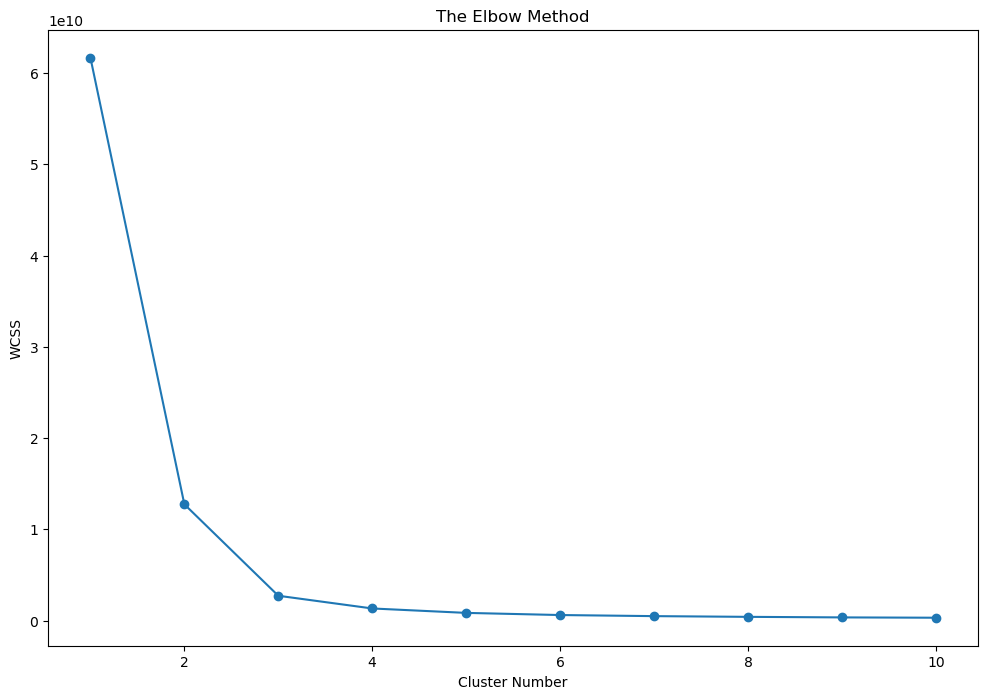

In [ ]:
#Scale
from sklearn.preprocessing import StandardScaler

df_scale = df_SP1
sc = StandardScaler()
df_scale_fit = sc.fit_transform(df_scale)
new_df = pd.DataFrame(data=df_SP1)

#Elbow Method
from sklearn.cluster import KMeans

wcss = []
for x in range (1,11):
  kmeans = KMeans(n_clusters = x, init='k-means++', random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')



In [ ]:
sc_data = StandardScaler()
data_std1 = sc_data.fit_transform(df_SP1.astype(float))

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_std1)

In [ ]:
df_data_std1 = pd.DataFrame(data=data_std1, columns=list(df_SP1))

In [ ]:
df_data_std1['clusters'] = kmeans.labels_
df_SP1['clusters'] = kmeans.labels_

In [ ]:
# PCA
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_data_std1)
pcs1 = pca.transform(df_data_std1)

data_pca1 = pd.DataFrame(data = pcs1, columns = ['PC 1', 'PC 2'])
data_pca1['clusters'] = df_SP1['clusters']
data_pca1.head()

,PC 1,PC 2,clusters
0,0.509573,-0.473602,0
1,-0.290969,0.023627,0
2,-0.202921,-0.813873,0
3,-0.091809,0.120906,0
4,-0.567437,-0.403031,0


In [ ]:
data_pca1['clusters'].value_counts()

0    39721
1      836
Name: clusters, dtype: int64

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

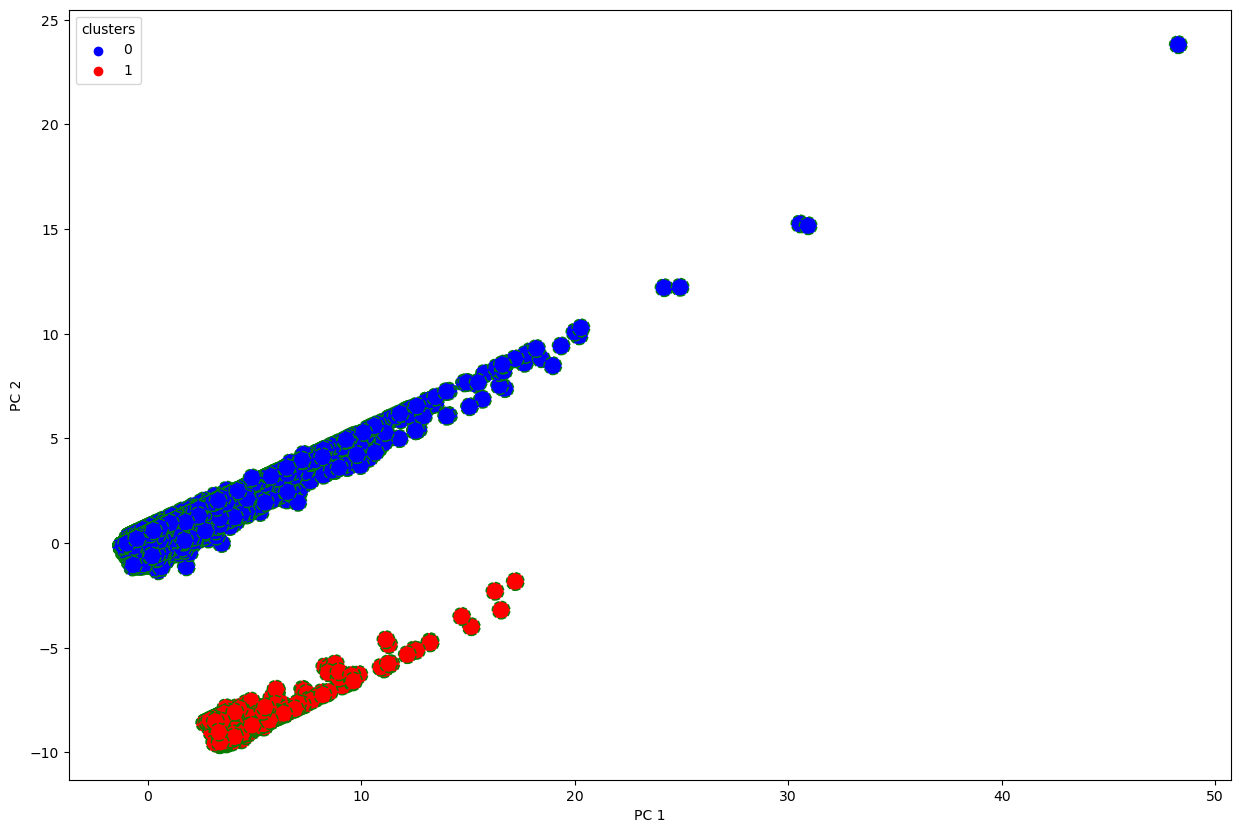

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca1,
    palette=['blue','red'],
    s=160,
    ax=ax
)

In [ ]:
pd.set_option('display.max_columns', 500)
display(df_SP1.groupby('clusters').agg(['mean','median']))

med_review_score        med_payment_value         med_price_per_item  \
                     mean median              mean  median               mean   
clusters                                                                        
0                4.249641    5.0        139.470730   91.35         114.246095   
1                1.740431    1.0        171.535921  103.49         142.609952   

                med_freight_value         med_handed_to_courier_time         \
         median              mean  median                       mean median   
clusters                                                                      
0          69.9         15.292561  13.070                  63.612434    2.0   
1          84.9         16.919264  12.995                  46.649522    0.0   

         med_delivery_time        total_prod        total_order         \
                      mean median       mean median        mean median   
clusters                                                                 
0               139.385426    8.0   1.203973    1.0    1.014325    1.0   
1                46.404306    0.0   1.208134    1.0    1.002392    1.0   

         order_status_approved        order_status_canceled         \
                          mean median                  mean median   
clusters                                                             
0                     0.000000    0.0              0.000000    0.0   
1                     0.001196    0.0              0.287081    0.0   

         order_status_delivered        order_status_invoiced         \
                           mean median                  mean median   
clusters                                                              
0                           1.0    1.0              0.000000    0.0   
1                           0.0    0.0              0.184211    0.0   

         order_status_processing        order_status_shipped         \
                            mean median                 mean median   
clusters                                                              
0                       0.000000    0.0             0.000000    0.0   
1                       0.160287    0.0             0.363636    0.0   

         order_status_unavailable         
                             mean median  
clusters                                  
0                        0.000000    0.0  
1                        0.003589    0.0

The purchase between cluster is not that different. But the customer in cluster 1 rate the seller lower than those in cluster 1, in which could be because the customer in this cluster most likely to cancel the order.

## Sales Timeseries Modelling

### Diff Transformation

In [ ]:
from datetime import timedelta

In [ ]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')
    
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    sns.lineplot(x=(second.date + timedelta(6*365/12)), y=y_col, data=second, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Date",
           ylabel = "Price",
           title = title)
    
    sns.despine()

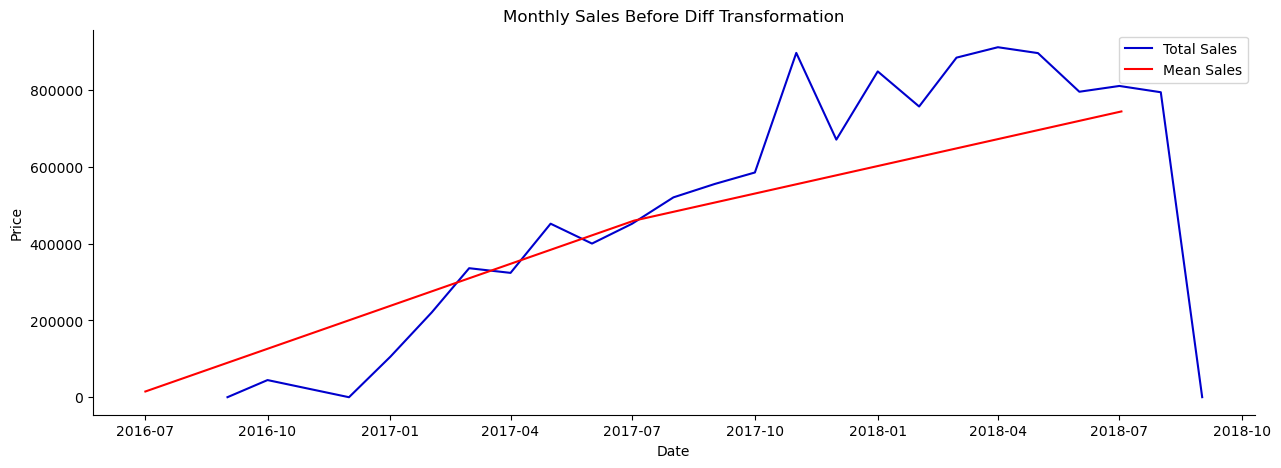

In [ ]:
time_plot(monthly_df1, 'date', 'price', 'Monthly Sales Before Diff Transformation')

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(monthly_df1['price'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.11365030508462676
p-value: 0.9480618227648427


Since the p-value is large, we cannot reject the null hypothesis and must assume that the time series is non-stationary.

### Log Transformation

In [ ]:
log_df = monthly_df1.copy()

In [ ]:
log_df['price'] = np.log(log_df['price'])
log_df['diff_price'] = log_df['price'].diff()

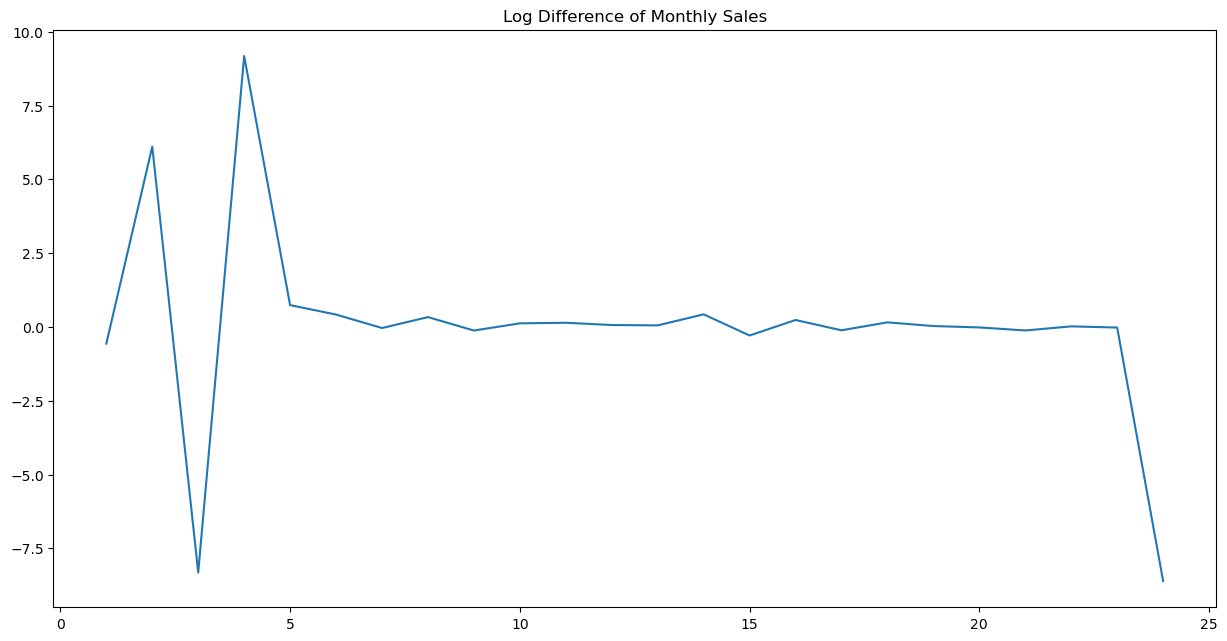

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(log_df['diff_price'])
plt.title("Log Difference of Monthly Sales")
plt.show()

In [ ]:
log_df.dropna(inplace=True)

In [ ]:
ad_fuller_result = adfuller(log_df['diff_price'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.661371147075988
p-value: 1.6851835222994895e-11


The p-value is small enough for us to reject the null hypothesis, and we can consider that the time series is stationary.

### SARIMA Modelling

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
best_model = SARIMAX(log_df['diff_price'], order=(12, 0, 3), seasonal_order=(0, 0, 3, 12)).fit(dis=-1)
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          diff_price   No. Observations:                   24
Model:             SARIMAX(12, 0, 3)x(0, 0, 3, 12)   Log Likelihood                 -55.671
Date:                             Sat, 10 Dec 2022   AIC                            149.343
Time:                                     23:50:49   BIC                            171.726
Sample:                                          0   HQIC                           155.281
                                              - 24                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0239     25.158     -0.001      0.999     -49.333      49.285
ar.L2          0.2219     1

* The p-value is 0.8, which is significantly higher than 0.05 (95% confidence threshold). So we accept the Null hypothesis of the Ljung-Box test that the residual errors are not auto-correlated.
* This is probably because the errors are some kurtotics (note that the Kurtosis=3.64 as a little bit more than the normal values of 3.0 to be considered as a normal distribution). 
* Note also that the errors are not at all skewed (skewness=-0.08 as against 0.0 for normally distributed errors).

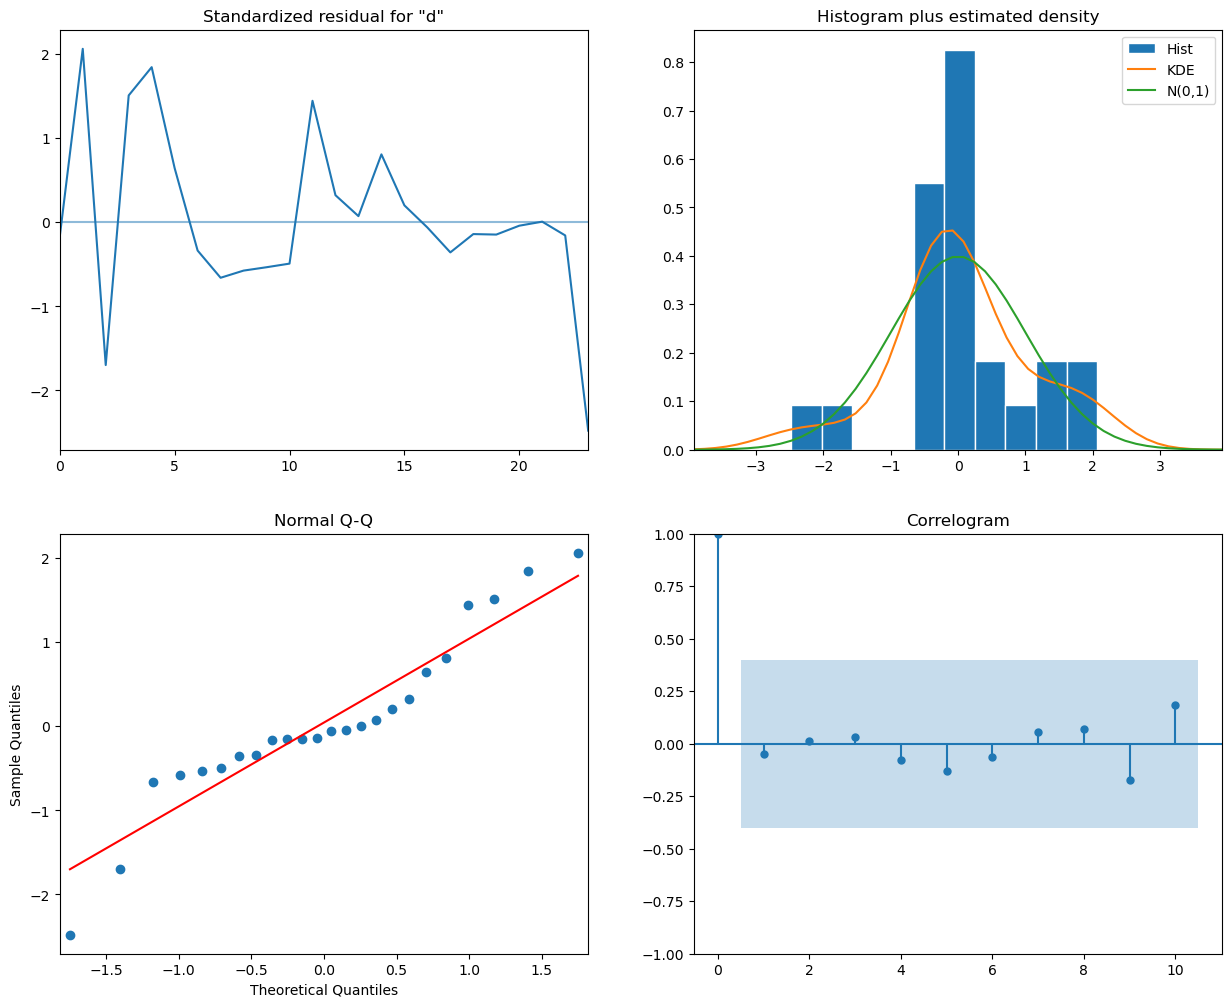

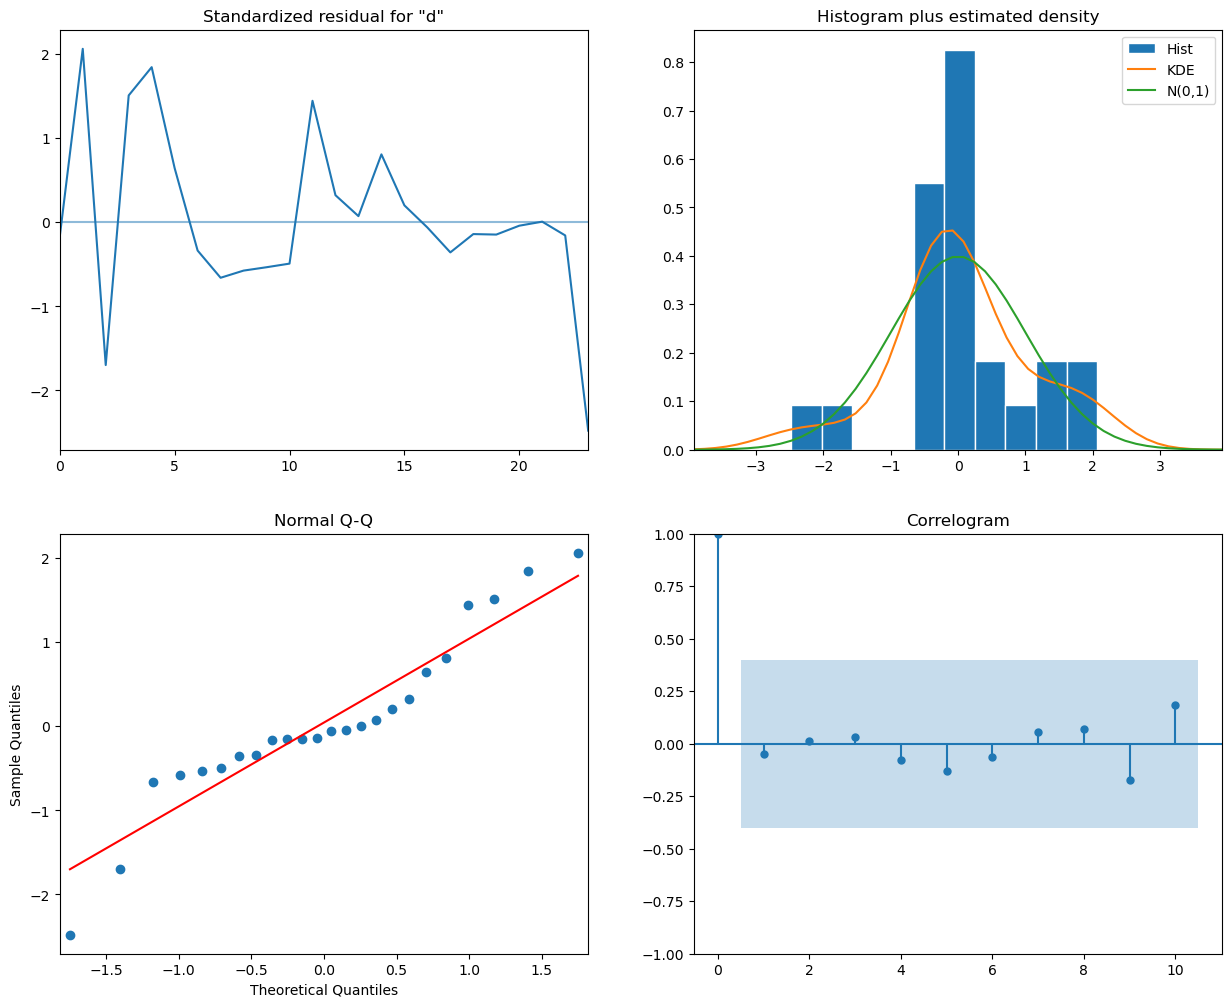

In [ ]:
best_model.plot_diagnostics(figsize=(15,12))

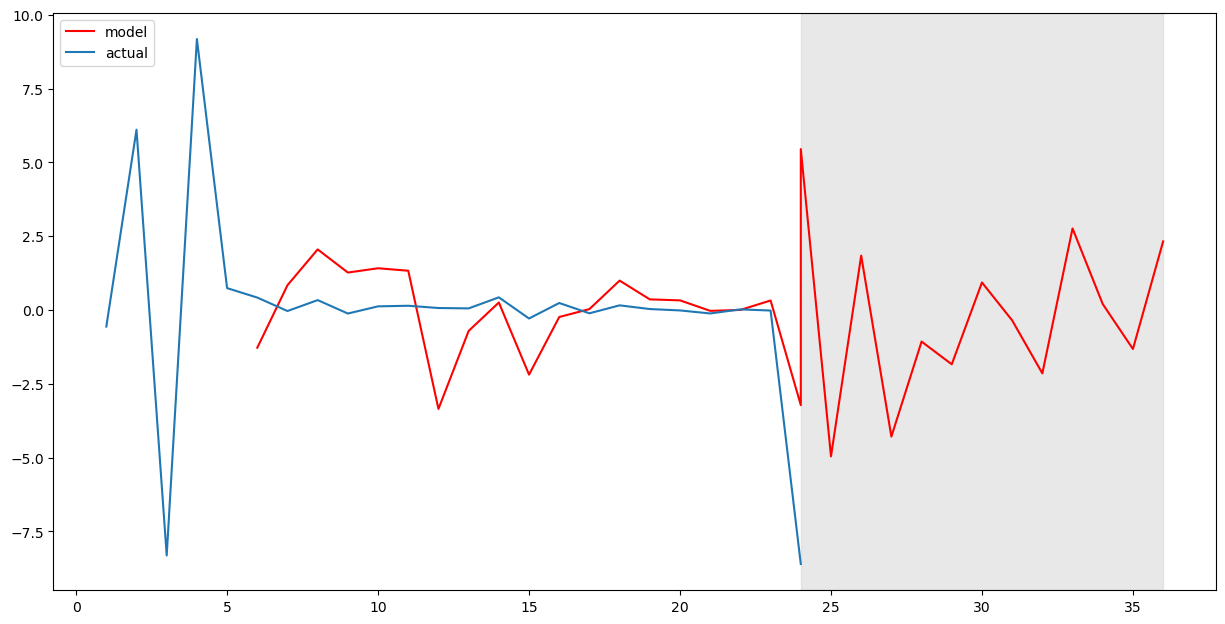

In [ ]:
log_df['arima_model'] = best_model.fittedvalues
log_df['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=log_df.shape[0], end=log_df.shape[0] + 12)
forecast = log_df['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(log_df.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(log_df['diff_price'], label='actual')
plt.legend()
plt.show()

In [ ]:
def get_scores(data):
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.diff_price[-12:], data.arima_model[-12:]))
    mae = mean_absolute_error(data.diff_price[-12:], data.arima_model[-12:])
    r2 = r2_score(data.diff_price[-12:], data.arima_model[-12:])
    mape = mean_absolute_percentage_error(data.diff_price[-12:], data.arima_model[-12:])
    model_scores['ARIMA'] = [rmse, mae, r2, mape]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE Score: {mape}")
    print(f"R2 Score: {r2}")
    

In [ ]:
get_scores(log_df)

RMSE: 1.6960790974398792
MAE: 0.8997638563338793
MAPE Score: 6.6871267411604025
R2 Score: 0.4983701153890522


## Order Timeseries Modelling

### Diff Transformation

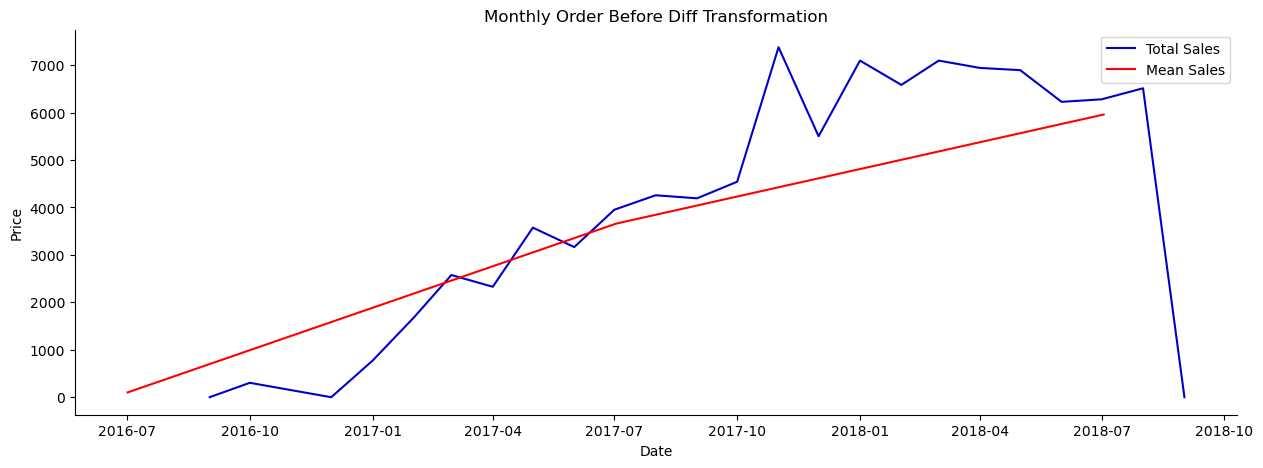

In [ ]:
time_plot(monthly_df, 'date', 'total_order', 'Monthly Order Before Diff Transformation')

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(monthly_df['total_order'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.8412471148502272
p-value: 0.8067048704040303


Since the p-value is large, we cannot reject the null hypothesis and must assume that the time series is non-stationary.

### Log Transformation

In [ ]:
order_log_df = monthly_df.copy()

In [ ]:
order_log_df['total_order'] = np.log(order_log_df['total_order'])
order_log_df['diff_order'] = order_log_df['total_order'].diff()

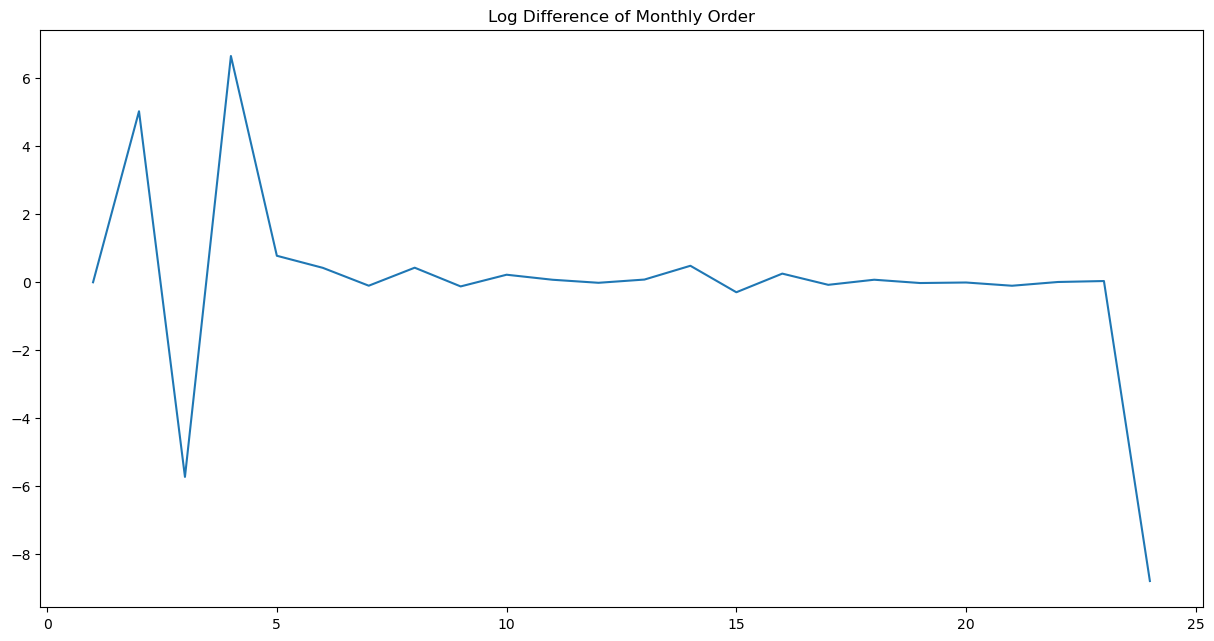

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(order_log_df['diff_order'])
plt.title("Log Difference of Monthly Order")
plt.show()

In [ ]:
order_log_df.dropna(inplace=True)

In [ ]:
ad_fuller_result = adfuller(order_log_df['diff_order'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.2032700304851796
p-value: 5.738341369390399e-08


The p-value is small enough for us to reject the null hypothesis, and we can consider that the time series is stationary.

### SARIMA Modelling

In [ ]:
best_model2 = SARIMAX(order_log_df['diff_order'], order=(12, 0, 3), seasonal_order=(0, 0, 3, 4)).fit(dis=-1)
print(best_model2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         diff_order   No. Observations:                   24
Model:             SARIMAX(12, 0, 3)x(0, 0, 3, 4)   Log Likelihood                 -52.212
Date:                            Sat, 10 Dec 2022   AIC                            142.424
Time:                                    23:59:24   BIC                            164.807
Sample:                                         0   HQIC                           148.362
                                             - 24                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0976     25.356     -0.004      0.997     -49.795      49.600
ar.L2          0.1799     18.854   

* The p-value is 0.96, which is significantly higher than 0.05 (95% confidence threshold). So we accept the Null hypothesis of the Ljung-Box test that the residual errors are not auto-correlated.
* This is probably because the errors are highly kurtotic (note that the Kurtosis=7.97 as a little bit more than the normal values of 3.0 to be considered as a normal distribution). 
* Note also that the errors are not at all skewed (skewness=-1.56 as against 0.0 for normally distributed errors).

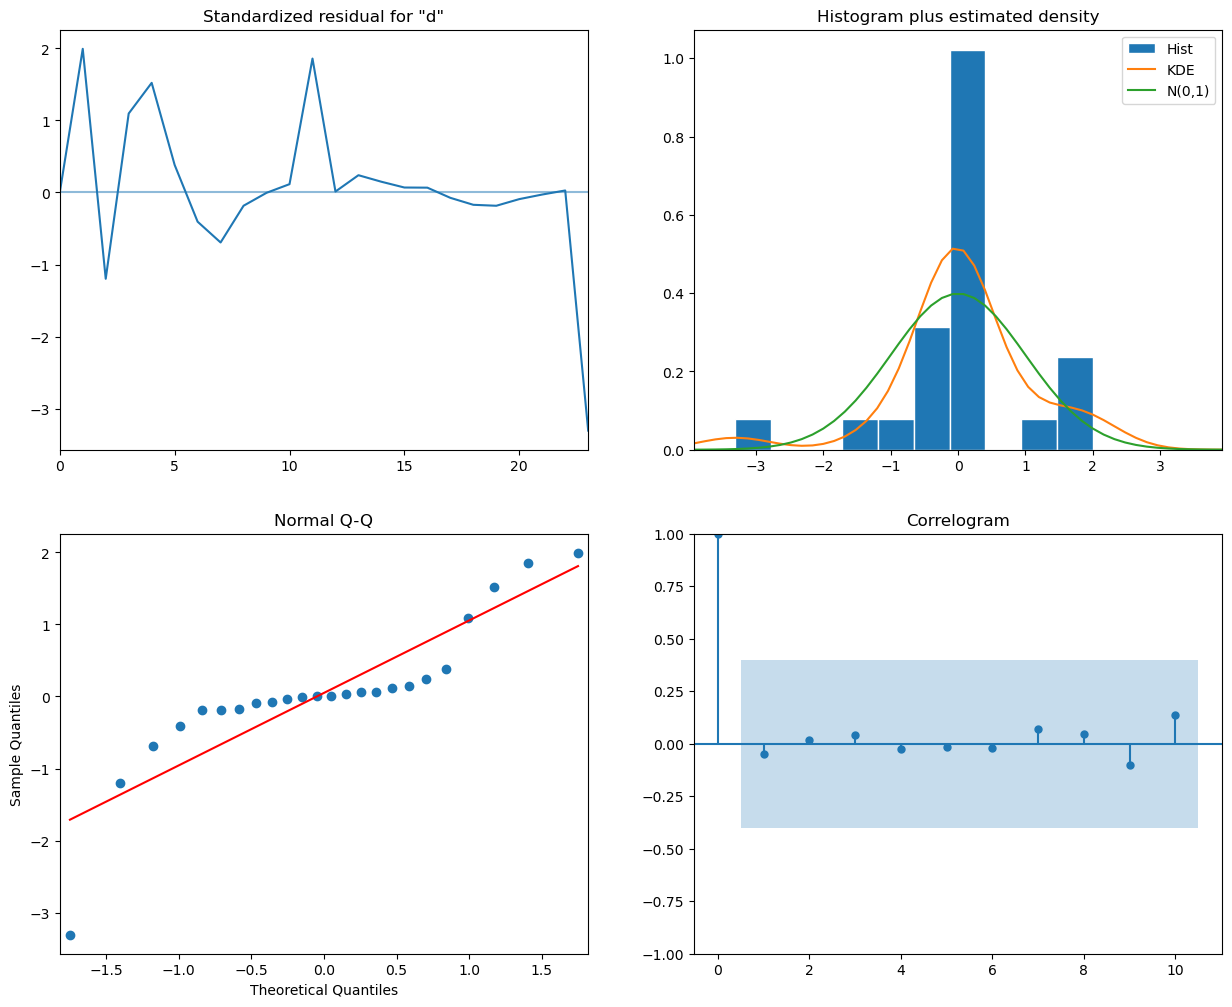

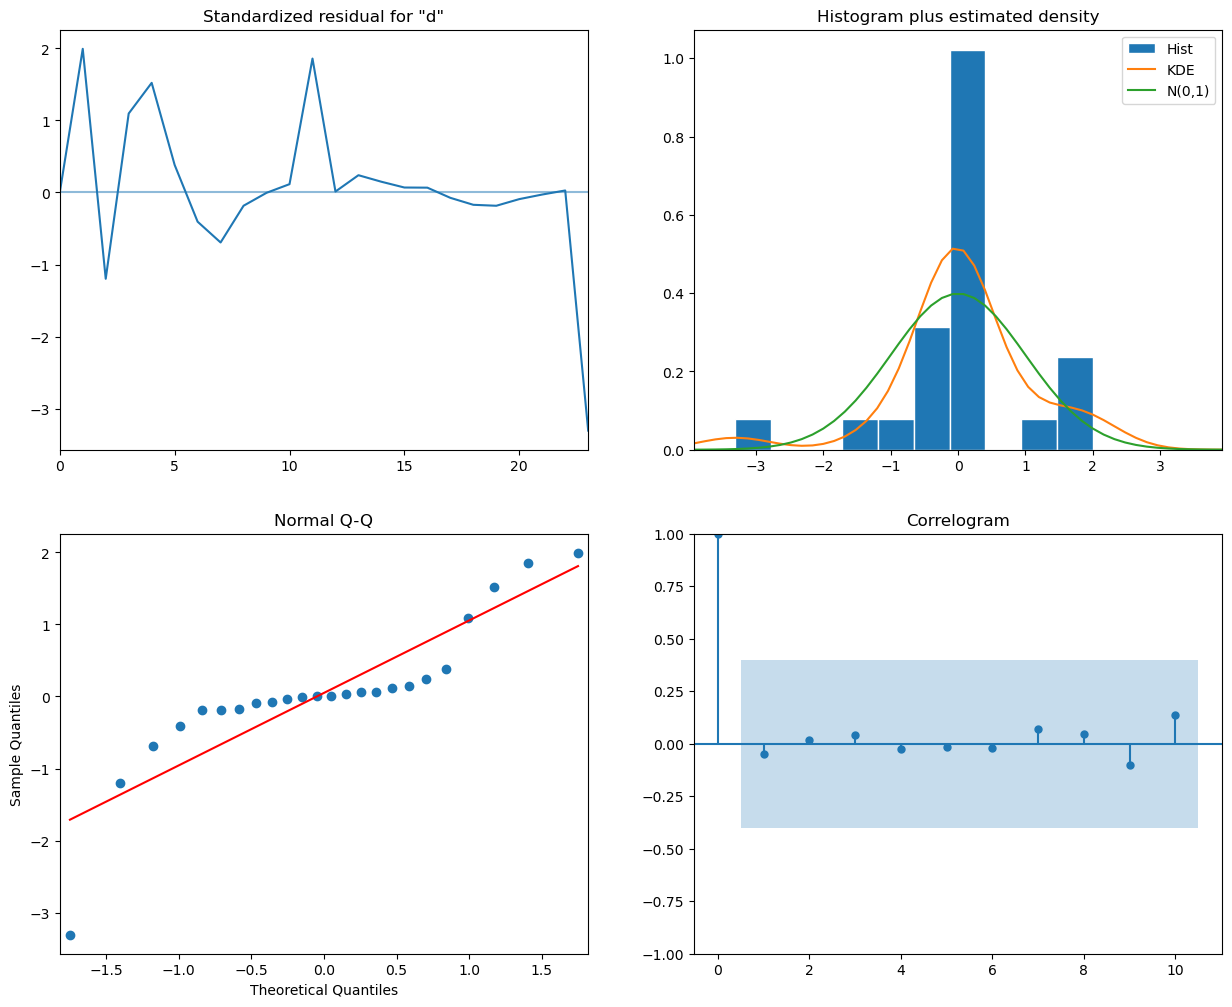

In [ ]:
best_model2.plot_diagnostics(figsize=(15,12))

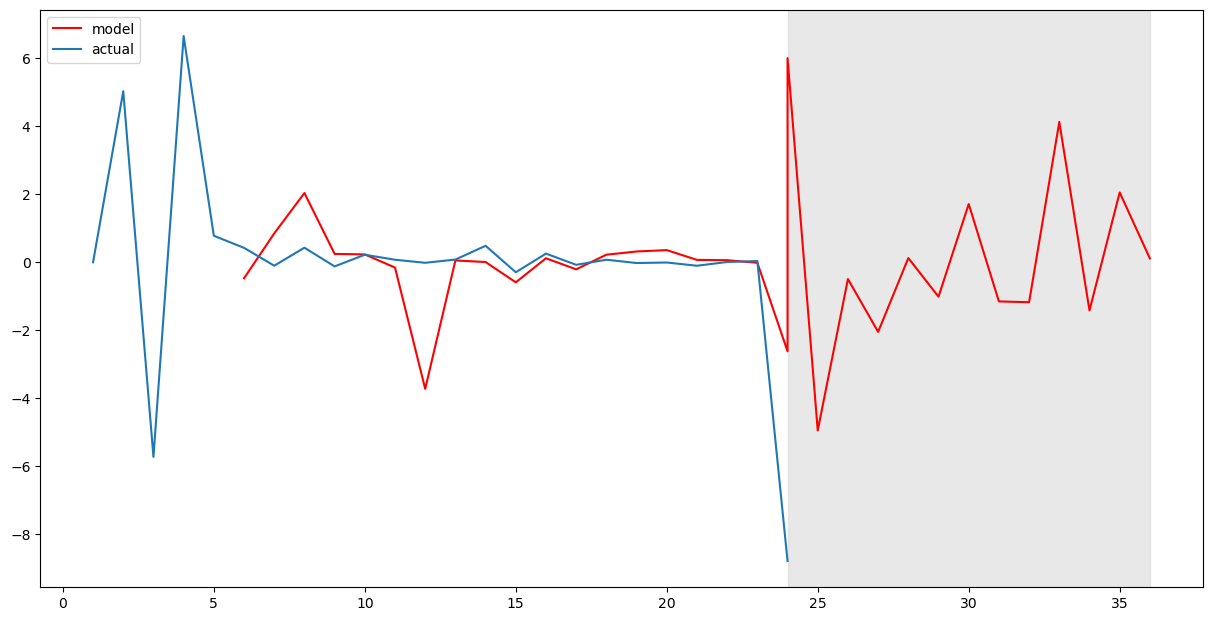

In [ ]:
order_log_df['arima_model'] = best_model2.fittedvalues
order_log_df['arima_model'][:4+1] = np.NaN
forecast2 = best_model2.predict(start=order_log_df.shape[0], end=order_log_df.shape[0] + 12)
forecast2 = order_log_df['arima_model'].append(forecast2)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast2, color='r', label='model')
plt.axvspan(order_log_df.index[-1], forecast2.index[-1], alpha=0.5, color='lightgrey')
plt.plot(order_log_df['diff_order'], label='actual')
plt.legend()
plt.show()

In [ ]:
def get_scores(data):
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.diff_order[-12:], data.arima_model[-12:]))
    mae = mean_absolute_error(data.diff_order[-12:], data.arima_model[-12:])
    r2 = r2_score(data.diff_order[-12:], data.arima_model[-12:])
    mape = mean_absolute_percentage_error(data.diff_order[-12:], data.arima_model[-12:])
    model_scores['ARIMA'] = [rmse, mae, r2, mape]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE Score: {mape}")
    print(f"R2 Score: {r2}")
    

In [ ]:
get_scores(order_log_df)

RMSE: 1.7950898285597963
MAE: 0.6968926916793278
MAPE Score: 7.2342974678460115
R2 Score: 0.4609288148560694


## Bed_Bath Order Time-series Prediction

### Diff Transformation

In [ ]:
bbb_order_df = monthly_order(df_bbb)

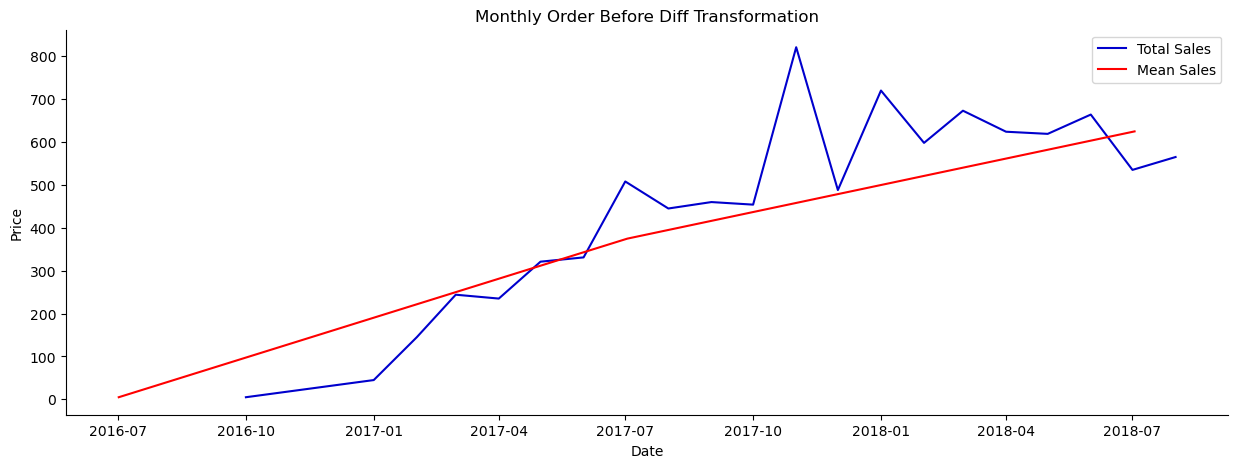

In [ ]:
time_plot(bbb_order_df, 'date', 'total_order', 'Monthly Order Before Diff Transformation')

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(bbb_order_df['total_order'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.2988256563544818
p-value: 0.1723470004520749


The p-value is small enough for us to reject the null hypothesis, and we can consider that the time series is stationary.

### SARIMA Modelling

In [ ]:
best_model1 = SARIMAX(bbb_log_df['total_order'], order=(0, 0, 3), seasonal_order=(0,0,3,4)).fit(dis=-1)
print(best_model1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                       total_order   No. Observations:                   20
Model:             SARIMAX(0, 0, 3)x(0, 0, 3, 4)   Log Likelihood                   9.649
Date:                           Sun, 11 Dec 2022   AIC                             -5.298
Time:                                   00:02:22   BIC                              1.672
Sample:                                        0   HQIC                            -3.937
                                            - 20                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.3583    365.732      0.004      0.997    -715.463     718.179
ma.L2          1.3568    142.511      0.010

* The p-value is 0.95, which is significantly higher than 0.05 (95% confidence threshold). So we accept the Null hypothesis of the Ljung-Box test that the residual errors are not auto-correlated.
* Note also that the errors are not at all skewed (skewness=-0.06 as against 0.0 for normally distributed errors).

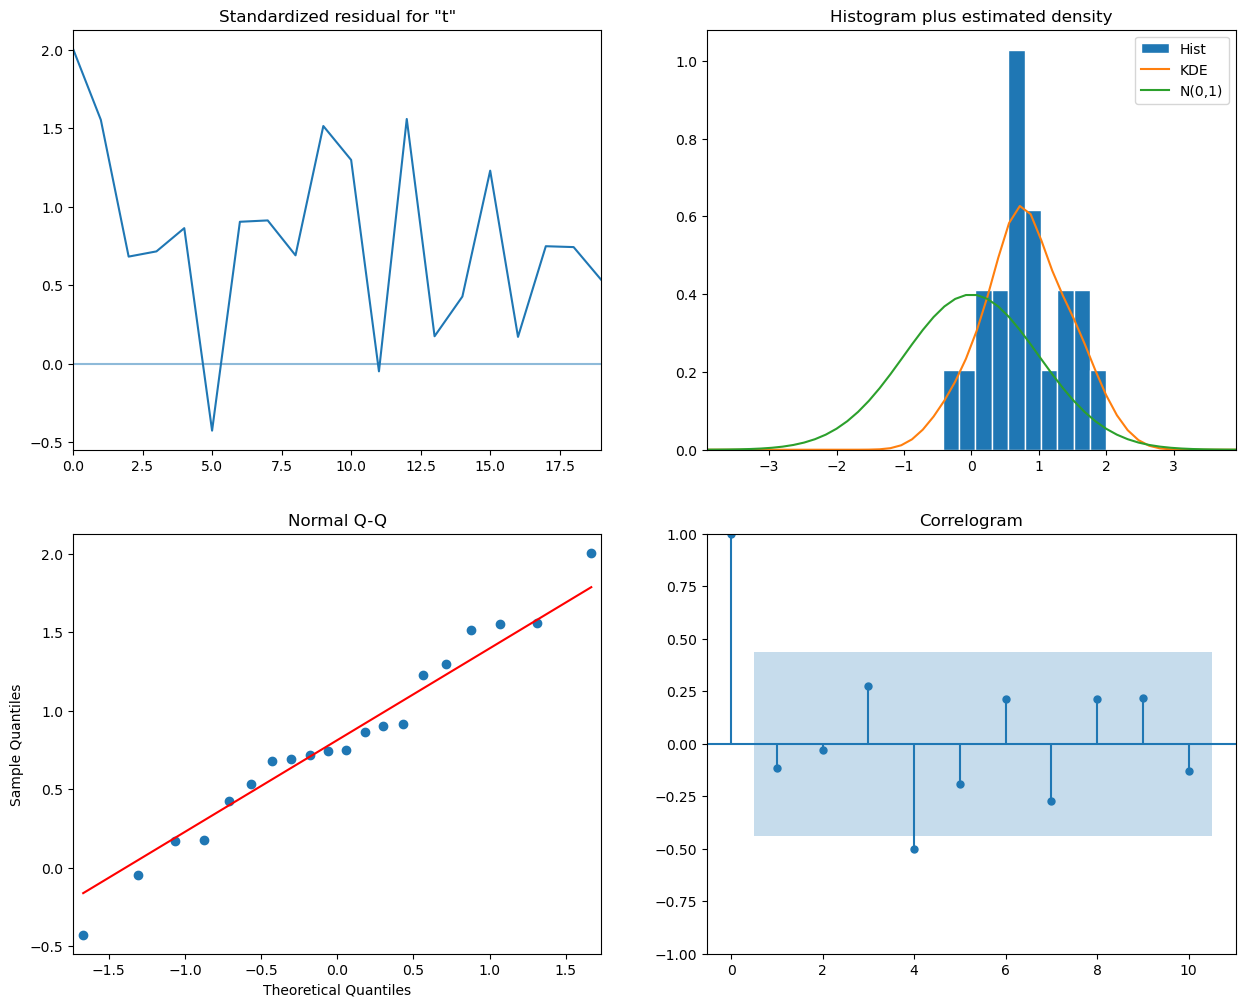

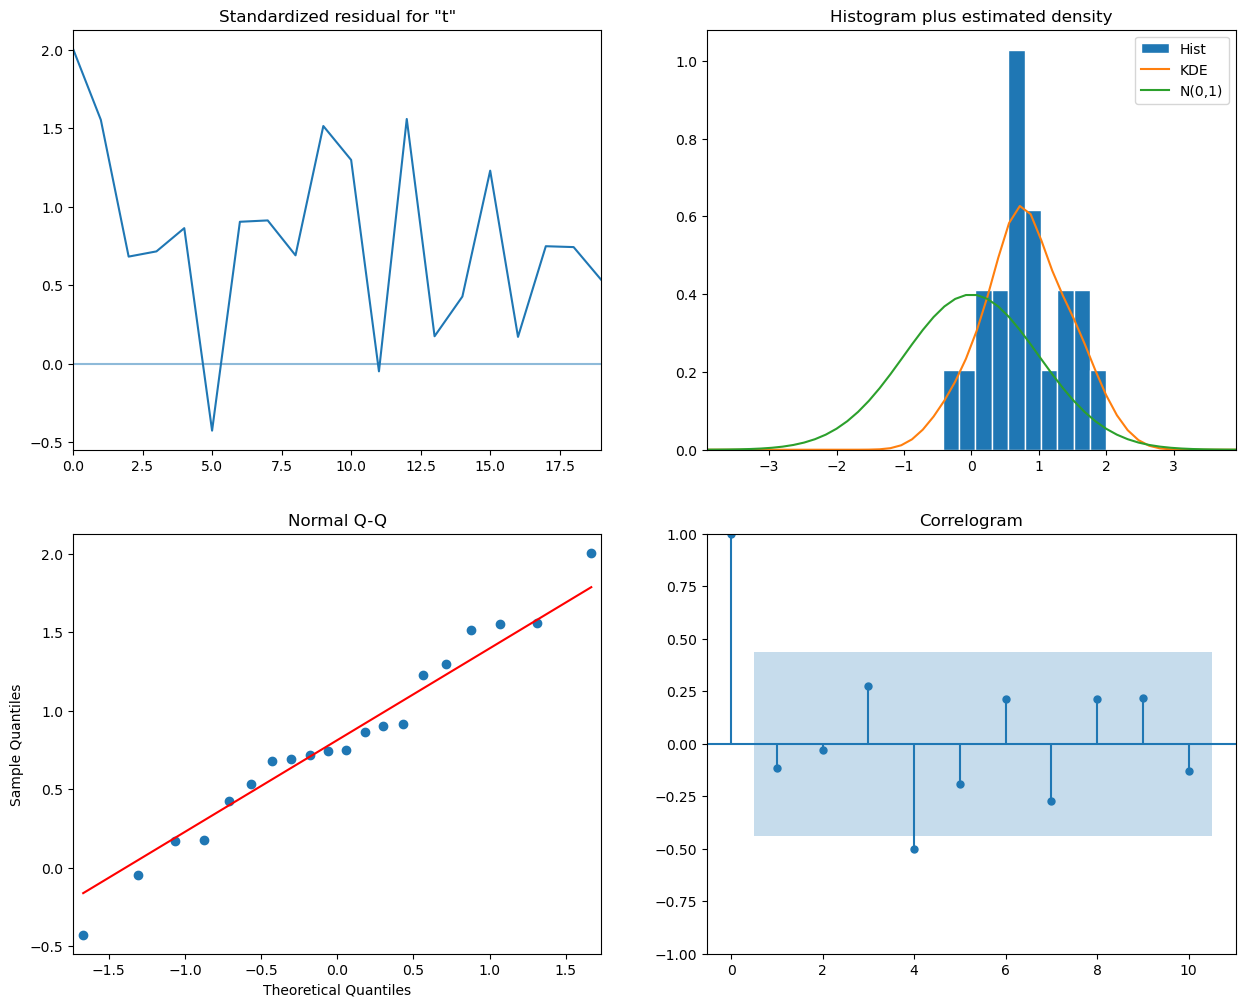

In [ ]:
best_model1.plot_diagnostics(figsize=(15,12))

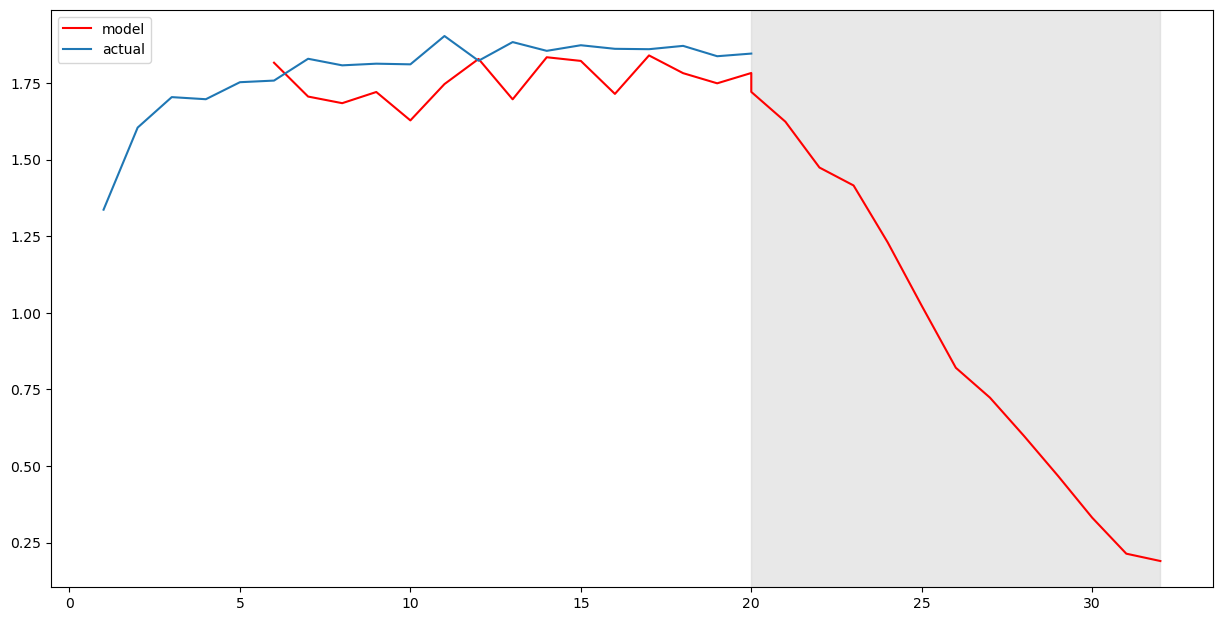

In [ ]:
bbb_log_df['arima_model'] = best_model1.fittedvalues
bbb_log_df['arima_model'][:4+1] = np.NaN
forecast1 = best_model1.predict(start=bbb_log_df.shape[0], end=bbb_log_df.shape[0] + 12)
forecast1 = bbb_log_df['arima_model'].append(forecast1)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast1, color='r', label='model')
plt.axvspan(bbb_log_df.index[-1], forecast1.index[-1], alpha=0.5, color='lightgrey')
plt.plot(bbb_log_df['total_order'], label='actual')
plt.legend()
plt.show()

In [ ]:
def get_scores1(data):
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.total_order[-12:], data.arima_model[-12:]))
    mae = mean_absolute_error(data.total_order[-12:], data.arima_model[-12:])
    r2 = r2_score(data.total_order[-12:], data.arima_model[-12:])
    mape = mean_absolute_percentage_error(data.total_order[-12:], data.arima_model[-12:])
    model_scores['ARIMA'] = [rmse, mae, r2, mape]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE Score: {mape}")
    print(f"R2 Score: {r2}")
    

In [ ]:
get_scores1(bbb_log_df)

RMSE: 0.11049228938142655
MAE: 0.09212934721656163
MAPE Score: 0.049619839515477854
R2 Score: -15.41935152557544
